In [32]:
import snowflake.connector
import pandas as pd

conn = snowflake.connector.connect(
    user='SHRISTIKUMAR',
    password='Datawarehouseproject123',
    account='ibwqohb-sh66712',  # ← Use this exactly, lowercase works fine
    warehouse='INDUSTRY_WH',
    database='INDUSTRY_REVIEW_SNOWFLAKE',
    schema='PUBLIC'
)

query = """
SELECT INDUSTRY, AVG_STARS, TOTAL_REVIEWS, TOTAL_USEFUL
FROM FACT_INDUSTRY_REVIEWS
ORDER BY AVG_STARS DESC
LIMIT 10
"""

df = pd.read_sql(query, conn)
print(df.head())


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/2352201688.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


                       INDUSTRY  AVG_STARS  TOTAL_REVIEWS  TOTAL_USEFUL
0            Fitness & Wellness       4.05           8106         12723
1  Beauty, Spas & Personal Care       3.98          20473         25418
2       Entertainment & Culture       3.88           8228         11281
3            Restaurants & Food       3.83         315350        272515
4                     Nightlife       3.82          46702         42864


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/3534233756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AVG_STARS', y='INDUSTRY', palette='viridis')


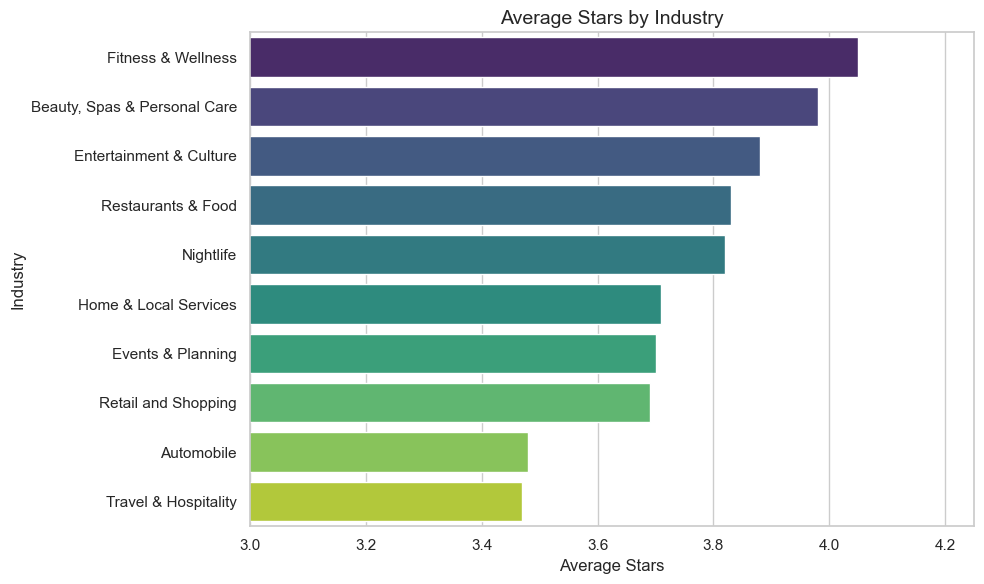

/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/3534233756.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TOTAL_USEFUL', y='INDUSTRY', palette='magma')


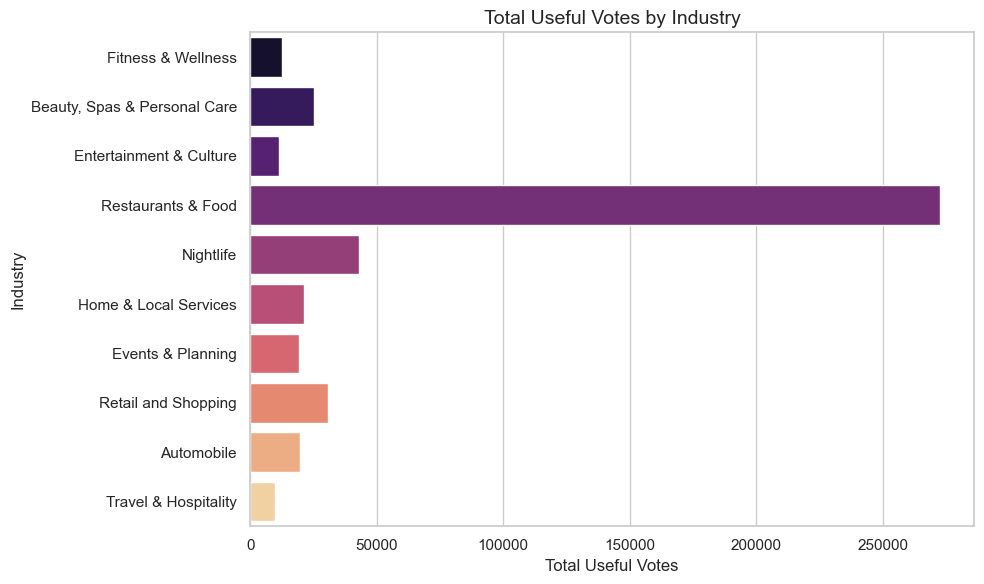

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Plot 1: Average Stars by Industry
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='AVG_STARS', y='INDUSTRY', palette='viridis')
plt.title('Average Stars by Industry', fontsize=14)
plt.xlabel('Average Stars')
plt.ylabel('Industry')
plt.xlim(3, df['AVG_STARS'].max() + 0.2)
plt.tight_layout()
plt.show()

# Plot 2: Total Useful Votes by Industry
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='TOTAL_USEFUL', y='INDUSTRY', palette='magma')
plt.title('Total Useful Votes by Industry', fontsize=14)
plt.xlabel('Total Useful Votes')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


In [11]:
import snowflake.connector
import pandas as pd

conn = snowflake.connector.connect(
    user='SHRISTIKUMAR',
    password='Datawarehouseproject123',
    account='ibwqohb-sh66712',  # ← Use this exactly, lowercase works fine
    warehouse='INDUSTRY_WH',
    database='FINAL_PROJECT',
    schema='PUBLIC'
)

query = """
SELECT *from DIM_INDUSTRY;
"""

df = pd.read_sql(query, conn)
print(df.head())


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/1399681667.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   INDUSTRY_ID                         INDUSTRY  \
0            1             Healthcare & Medical   
1            2  Travel, Hotels & Transportation   
2            3             Education & Learning   
3            4      Community & Public Services   
4            6             Travel & Hospitality   

                                          CATEGORIES  
0  Addiction Medicine, Allergists, Audiologist, B...  
1  Airlines, Airport Lounges, Airport Terminals, ...  
2  Adult Education, Child Care & Day Care, Childb...  
3  Community Centers, Courthouses, Departments of...  
4                            Hotels, Hotels & Travel  


In [12]:
query = """
SELECT 
    di.INDUSTRY,
    fi.AVG_SENTIMENT_SCORE
FROM FACT_INDUSTRY fi
JOIN DIM_INDUSTRY di ON fi.INDUSTRY_ID = di.INDUSTRY_ID
ORDER BY fi.AVG_SENTIMENT_SCORE DESC;
"""

df = pd.read_sql(query, conn)
print(df.head())


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/877477773.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


                      INDUSTRY  AVG_SENTIMENT_SCORE
0           Fitness & Wellness                  1.0
1  Beverages & Specialty Foods                  1.0
2        Home & Local Services                  1.0
3  Beverages & Specialty Foods                  1.0
4        Home & Local Services                  1.0


In [13]:
query = """
SELECT 
    dd.MONTH_NAME,
    dd.YEAR,
    COUNT(fr.REVIEW_ID) AS TOTAL_REVIEWS
FROM FACT_REVIEWS fr
JOIN DIM_DATE dd ON fr.DATE_KEY = dd.DATE_KEY
GROUP BY dd.MONTH_NAME, dd.YEAR
ORDER BY dd.YEAR, dd.MONTH_NAME;
"""

df = pd.read_sql(query, conn)
print(df.head())

/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/3220042398.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  MONTH_NAME  YEAR  TOTAL_REVIEWS
0      Janth  2010         210000


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/469786127.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  SENTIMENT_LABEL  REVIEW_COUNT
0        Positive        416677
1         Neutral         41973
2        Negative         41350


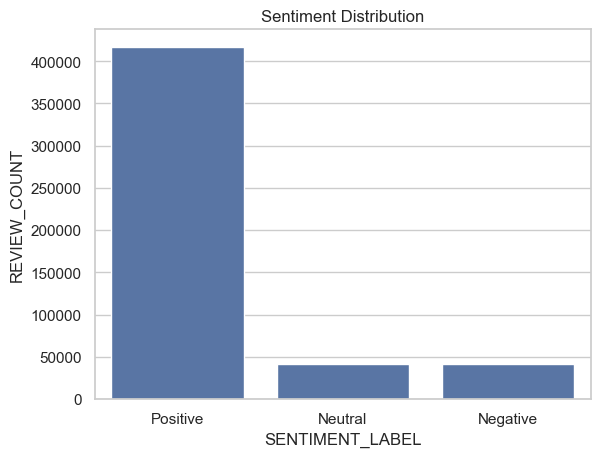

In [18]:
query = """
SELECT 
    SENTIMENT_LABEL,
    COUNT(*) AS REVIEW_COUNT
FROM DIM_REVIEW_SENTIMENTS
GROUP BY SENTIMENT_LABEL;;
"""

df = pd.read_sql(query, conn)
print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='SENTIMENT_LABEL', y='REVIEW_COUNT', data=df)
plt.title('Sentiment Distribution')
plt.show()

/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/548612613.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


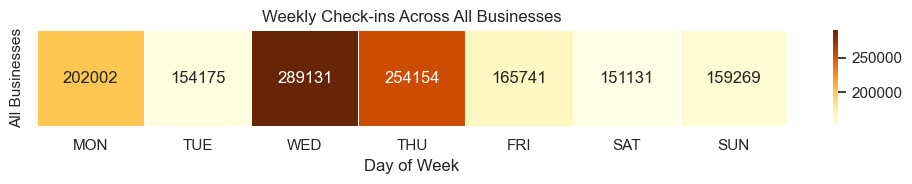

In [22]:
query = """
SELECT 
    SUM(MONDAY) AS MON,
    SUM(TUESDAY) AS TUE,
    SUM(WEDNESDAY) AS WED,
    SUM(THURSDAY) AS THU,
    SUM(FRIDAY) AS FRI,
    SUM(SATURDAY) AS SAT,
    SUM(SUNDAY) AS SUN
FROM DIM_BUSINESS;;
"""

df = pd.read_sql(query, conn)

# Reshape for heatmap: set index to something like "All Businesses"
df.index = ['All Businesses']

# Reorder columns to follow calendar order (if needed)
df = df[['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']]

# Create heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(df, annot=True, fmt='d', cmap='YlOrBr', linewidths=0.5)
plt.title('Weekly Check-ins Across All Businesses')
plt.xlabel('Day of Week')
plt.ylabel('')

plt.tight_layout()
plt.show()
query = """
SELECT 
    SUM(MONDAY) AS MON,
    SUM(TUESDAY) AS TUE,
    SUM(WEDNESDAY) AS WED,
    SUM(THURSDAY) AS THU,
    SUM(FRIDAY) AS FRI,
    SUM(SATURDAY) AS SAT,
    SUM(SUNDAY) AS SUN
FROM DIM_BUSINESS;;
"""

df = pd.read_sql(query, con

/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/2044150479.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


                      INDUSTRY       MON       TUE       WED       THU  \
0           Restaurants & Food  39237771  33179829  59052727  57808082   
1  Beverages & Specialty Foods    111604      6504    220434    121784   
2         Education & Learning     14228     10603     19179     10083   
3      Entertainment & Culture    806622    659663   1513561   1373433   
4           Fitness & Wellness    854042    743075   1272309   1206273   

        FRI       SAT       SUN  
0  30752574  28030956  28947406  
1     72058     90437     75749  
2     13942     13011     13721  
3    570354    503395    549276  
4    714550    766729    840115  


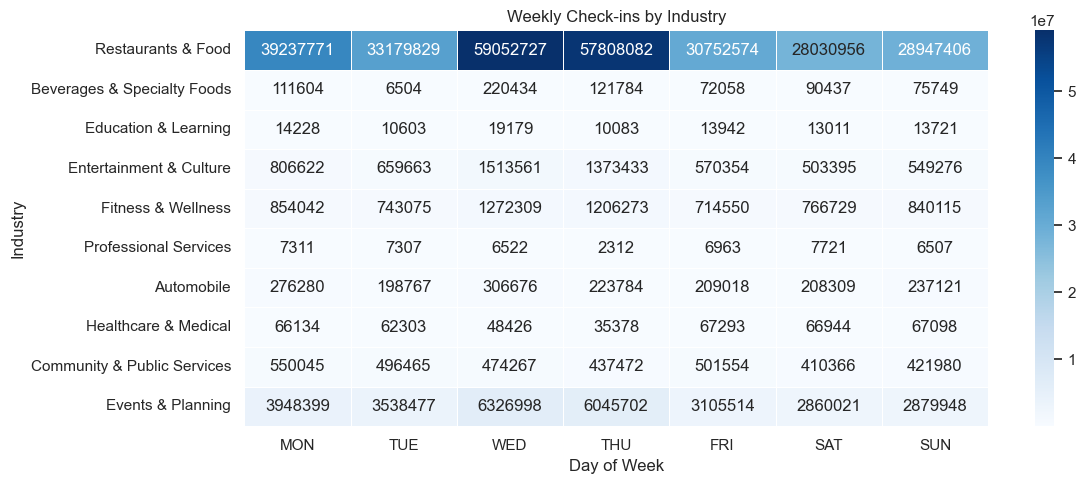

In [28]:

query = """
SELECT 
    di.INDUSTRY,
    SUM(db.MONDAY) AS MON,
    SUM(db.TUESDAY) AS TUE,
    SUM(db.WEDNESDAY) AS WED,
    SUM(db.THURSDAY) AS THU,
    SUM(db.FRIDAY) AS FRI,
    SUM(db.SATURDAY) AS SAT,
    SUM(db.SUNDAY) AS SUN
FROM DIM_BUSINESS db
JOIN FACT_REVIEWS fr ON db.BUSINESS_ID = fr.BUSINESS_ID
JOIN DIM_INDUSTRY di ON fr.INDUSTRY_ID = di.INDUSTRY_ID
GROUP BY di.INDUSTRY
LIMIT 10;
"""

df = pd.read_sql(query, conn)
print(df.head())

df.set_index('INDUSTRY', inplace=True)

# Create heatmap
plt.figure(figsize=(12, len(df) * 0.5))  # Dynamically scale height based on number of industries
sns.heatmap(df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Weekly Check-ins by Industry')
plt.xlabel('Day of Week')
plt.ylabel('Industry')

plt.tight_layout()
plt.show()

/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/2115426527.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_viz = pd.read_sql(query, conn)


                      INDUSTRY  AVG_SENTIMENT_SCORE
0           Fitness & Wellness                  1.0
1  Beverages & Specialty Foods                  1.0
2        Home & Local Services                  1.0
3  Beverages & Specialty Foods                  1.0
4        Home & Local Services                  1.0


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/2115426527.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_viz, x='AVG_SENTIMENT_SCORE', y='INDUSTRY', palette='coolwarm')


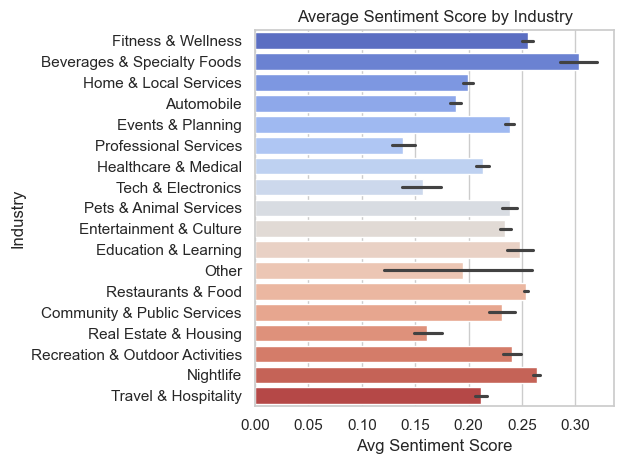

In [47]:
import snowflake.connector
import pandas as pd

conn = snowflake.connector.connect(
    user='SHRISTIKUMAR',
    password='Datawarehouseproject123',
    account='ibwqohb-sh66712',  # ← Use this exactly, lowercase works fine
    warehouse='INDUSTRY_WH',
    database='FINAL_PROJECT',
    schema='PUBLIC'
)


query = """
SELECT di.INDUSTRY, fi.AVG_SENTIMENT_SCORE
FROM FACT_INDUSTRY fi
JOIN DIM_INDUSTRY di ON fi.INDUSTRY_ID = di.INDUSTRY_ID
ORDER BY fi.AVG_SENTIMENT_SCORE DESC;
"""

df_viz = pd.read_sql(query, conn)

print(df_viz.head())

sns.barplot(data=df_viz, x='AVG_SENTIMENT_SCORE', y='INDUSTRY', palette='coolwarm')
plt.title("Average Sentiment Score by Industry")
plt.xlabel("Avg Sentiment Score")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/2115426527.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_viz = pd.read_sql(query, conn)


                      INDUSTRY  AVG_SENTIMENT_SCORE
0           Fitness & Wellness                  1.0
1  Beverages & Specialty Foods                  1.0
2        Home & Local Services                  1.0
3  Beverages & Specialty Foods                  1.0
4        Home & Local Services                  1.0


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/2115426527.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_viz, x='AVG_SENTIMENT_SCORE', y='INDUSTRY', palette='coolwarm')


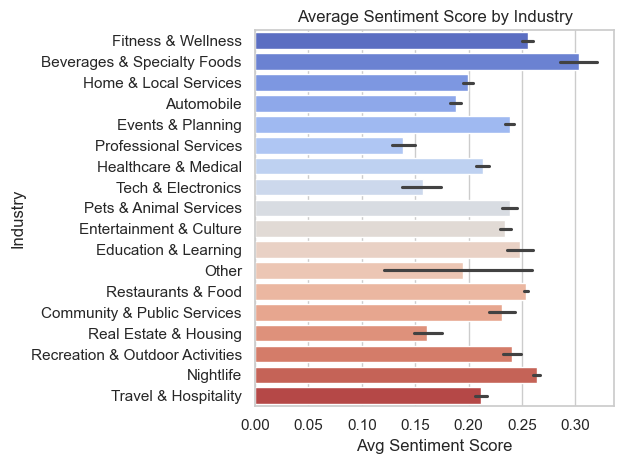

In [47]:
import snowflake.connector
import pandas as pd

conn = snowflake.connector.connect(
    user='SHRISTIKUMAR',
    password='Datawarehouseproject123',
    account='ibwqohb-sh66712',  # ← Use this exactly, lowercase works fine
    warehouse='INDUSTRY_WH',
    database='FINAL_PROJECT',
    schema='PUBLIC'
)


query = """
SELECT di.INDUSTRY, fi.AVG_SENTIMENT_SCORE
FROM FACT_INDUSTRY fi
JOIN DIM_INDUSTRY di ON fi.INDUSTRY_ID = di.INDUSTRY_ID
ORDER BY fi.AVG_SENTIMENT_SCORE DESC;
"""

df_viz = pd.read_sql(query, conn)

print(df_viz.head())

sns.barplot(data=df_viz, x='AVG_SENTIMENT_SCORE', y='INDUSTRY', palette='coolwarm')
plt.title("Average Sentiment Score by Industry")
plt.xlabel("Avg Sentiment Score")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/4039594467.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_viz = pd.read_sql(query, conn)


     INDUSTRY  YEAR  POSITIVE_COUNT  NEGATIVE_COUNT  NEUTRAL_COUNT
0  Automobile  2005               2               0              0
1  Automobile  2006               1               0              0
2  Automobile  2007               5               1              1
3  Automobile  2008              23               3              2
4  Automobile  2009              51               5              9


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/4039594467.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_viz, x='NEGATIVE_COUNT', y='INDUSTRY', palette='coolwarm')


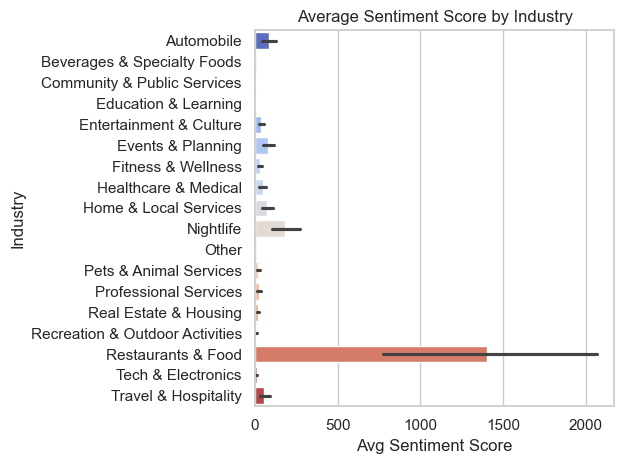

In [52]:
import snowflake.connector
import pandas as pd

conn = snowflake.connector.connect(
    user='SHRISTIKUMAR',
    password='Datawarehouseproject123',
    account='ibwqohb-sh66712',  # ← Use this exactly, lowercase works fine
    warehouse='INDUSTRY_WH',
    database='FINAL_PROJECT',
    schema='PUBLIC'
)


query = """
SELECT 
    di.INDUSTRY,
    EXTRACT(YEAR FROM fi.DATE_KEY) AS YEAR,
    SUM(fi.POSITIVE_COUNT) AS POSITIVE_COUNT,
    SUM(fi.NEGATIVE_COUNT) AS NEGATIVE_COUNT,
    SUM(fi.NEUTRAL_COUNT) AS NEUTRAL_COUNT
FROM FACT_INDUSTRY fi
JOIN DIM_INDUSTRY di ON fi.INDUSTRY_ID = di.INDUSTRY_ID
GROUP BY di.INDUSTRY, EXTRACT(YEAR FROM fi.DATE_KEY)
ORDER BY di.INDUSTRY, YEAR;
"""

df_viz = pd.read_sql(query, conn)

print(df_viz.head())

sns.barplot(data=df_viz, x='NEGATIVE_COUNT', y='INDUSTRY', palette='coolwarm')
plt.title("Average Sentiment Score by Industry")
plt.xlabel("Avg Sentiment Score")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/1466228760.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


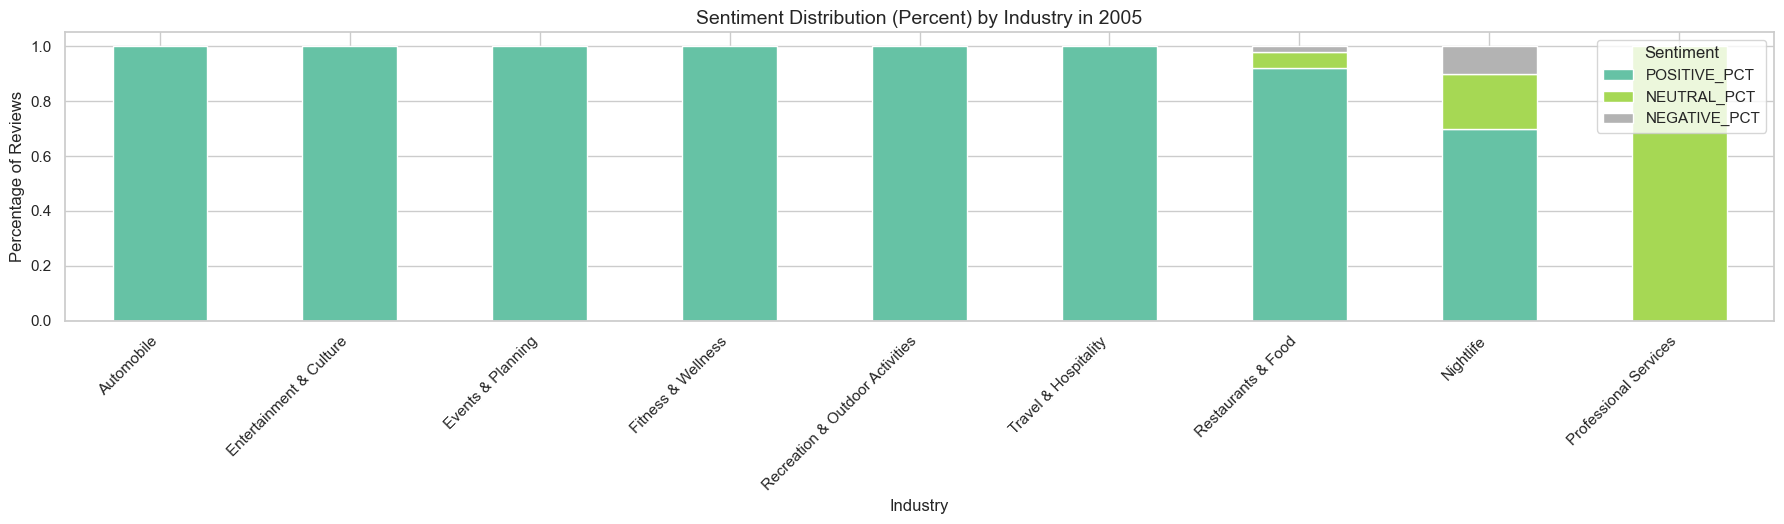

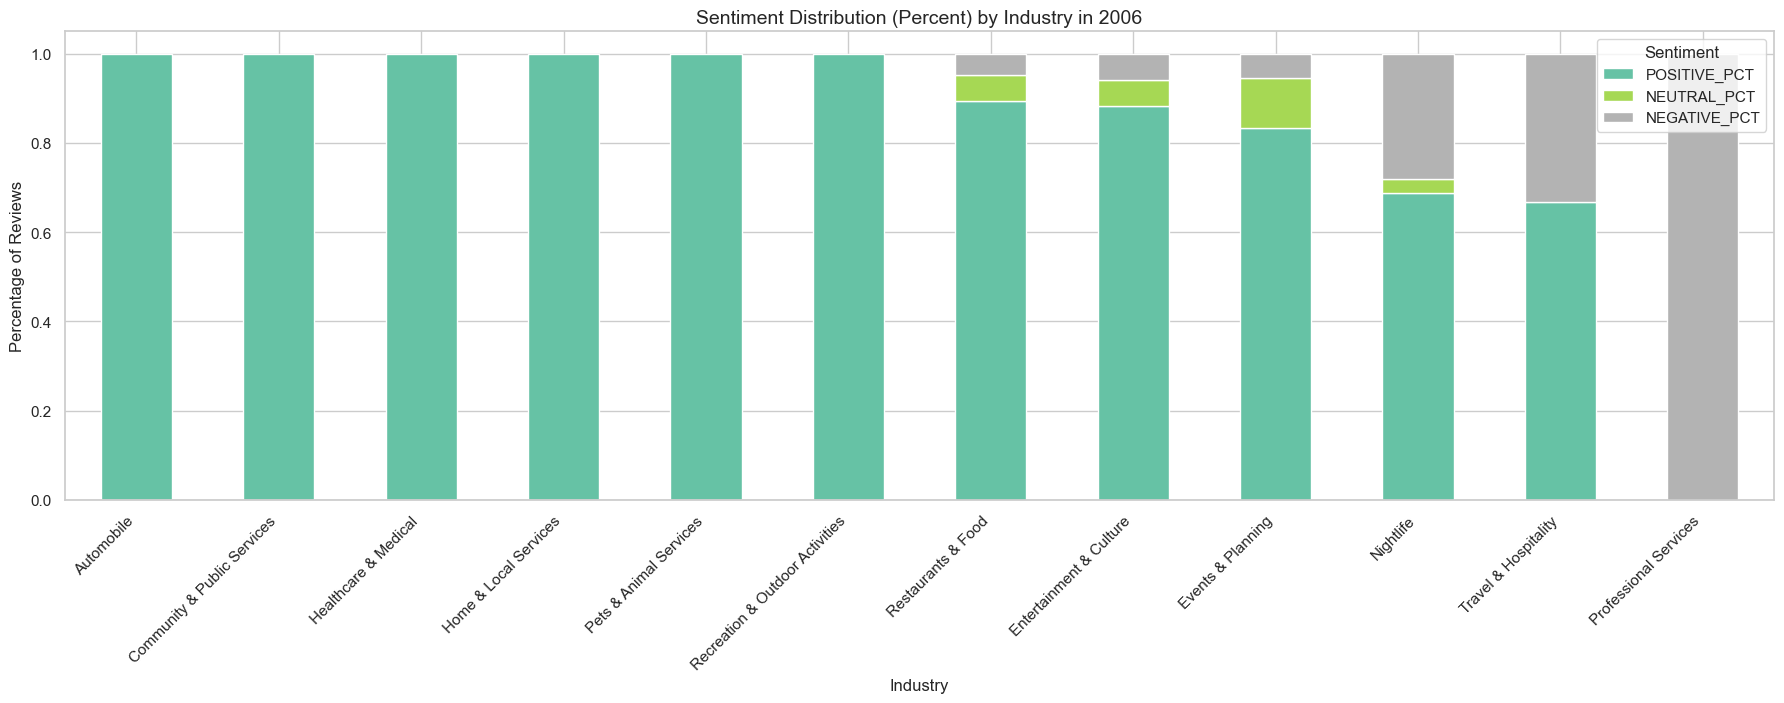

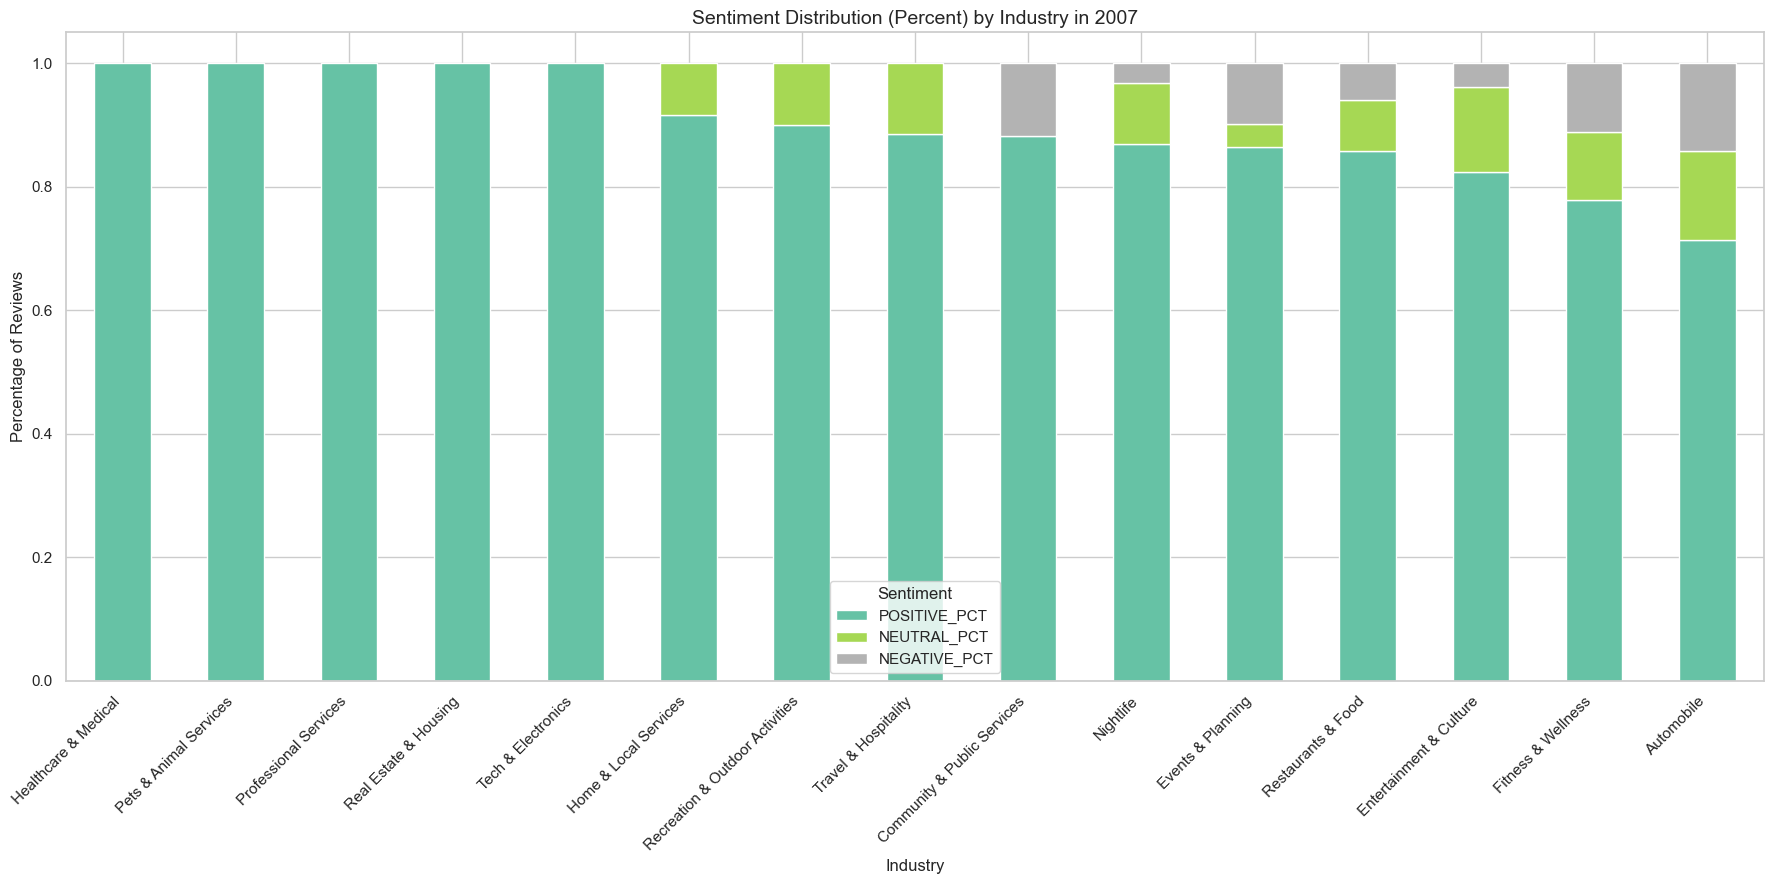

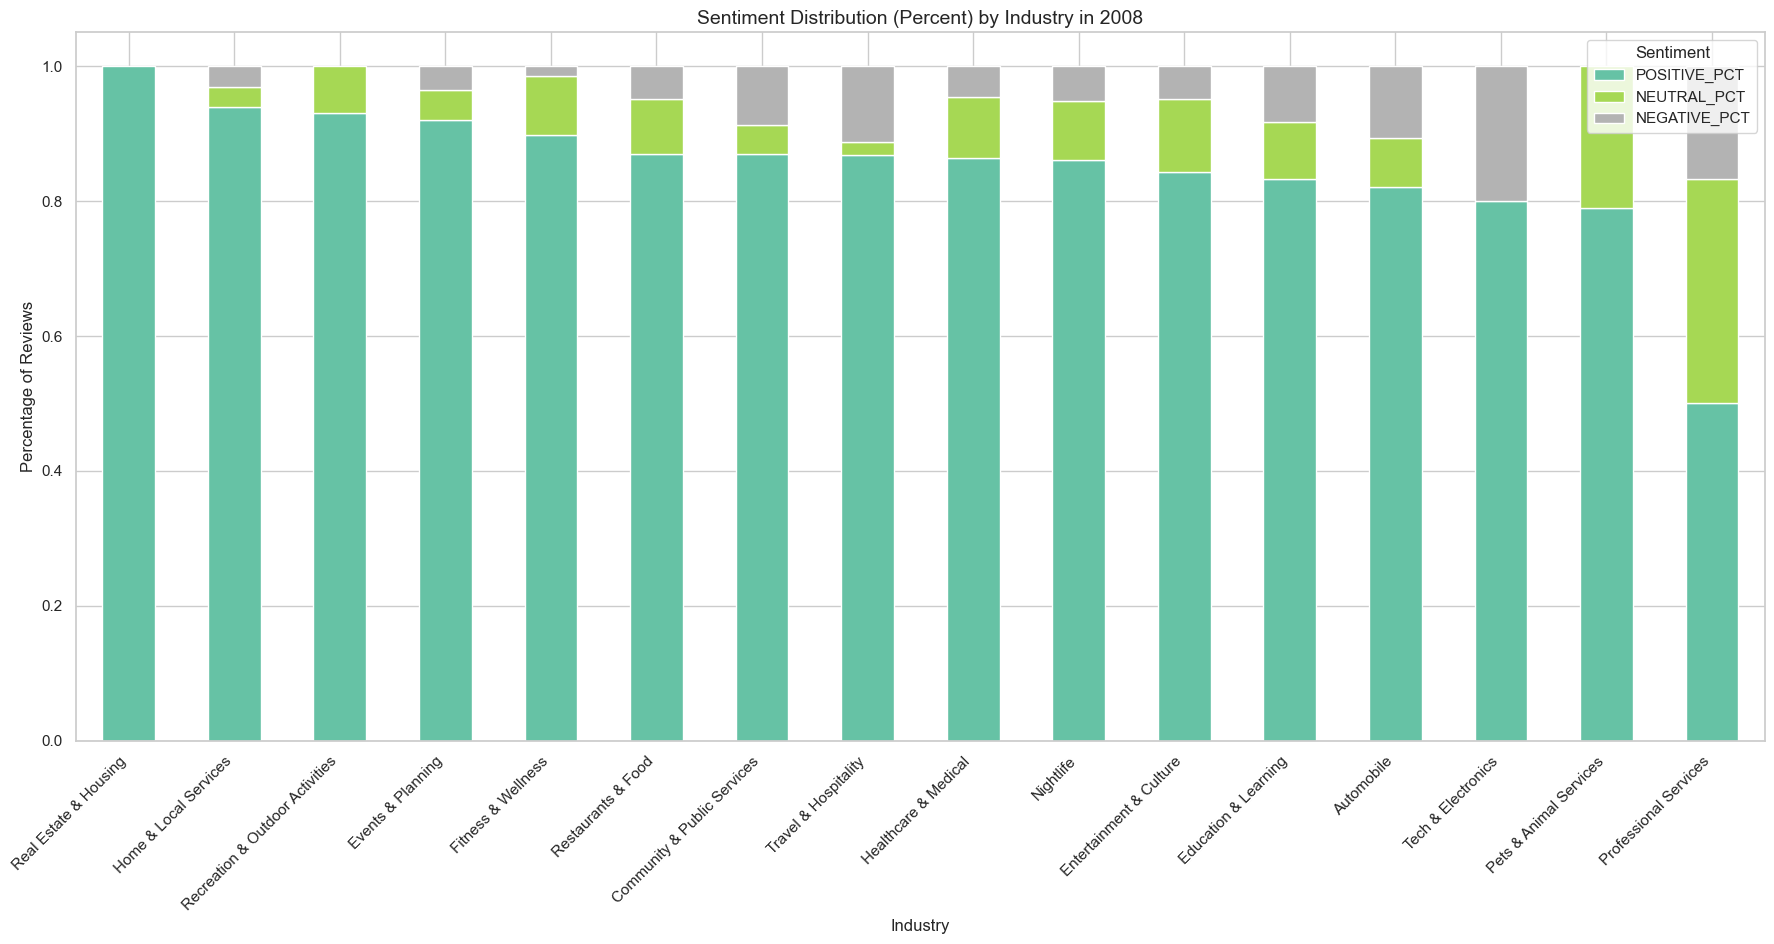

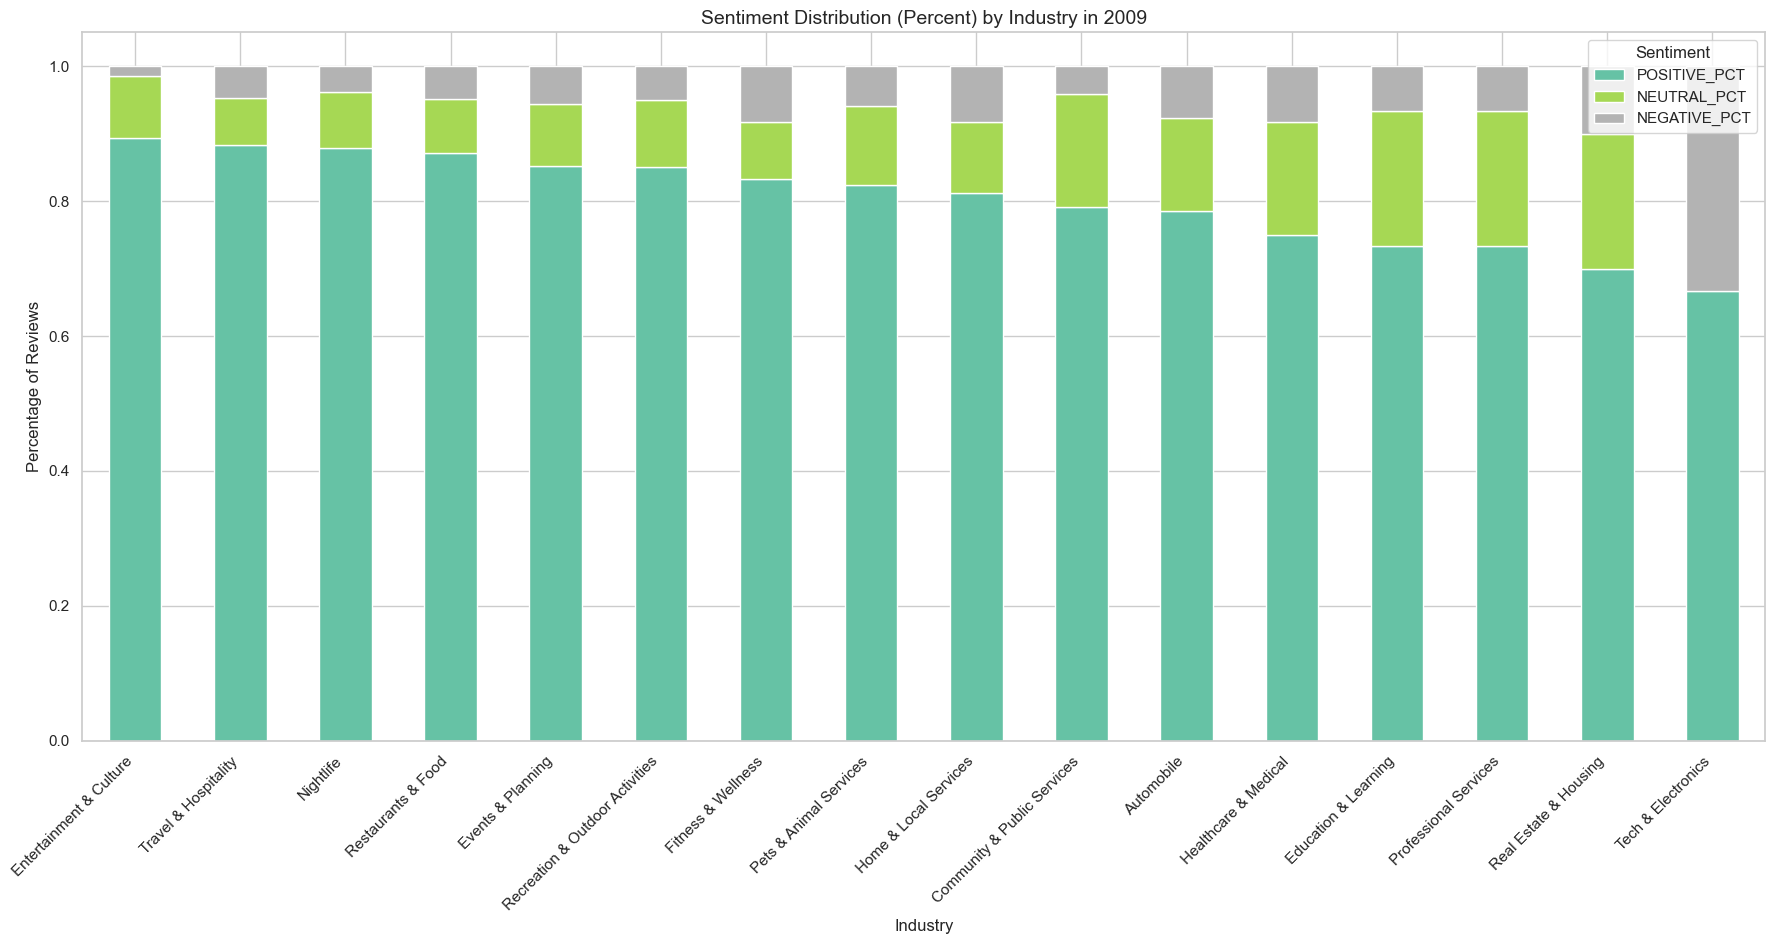

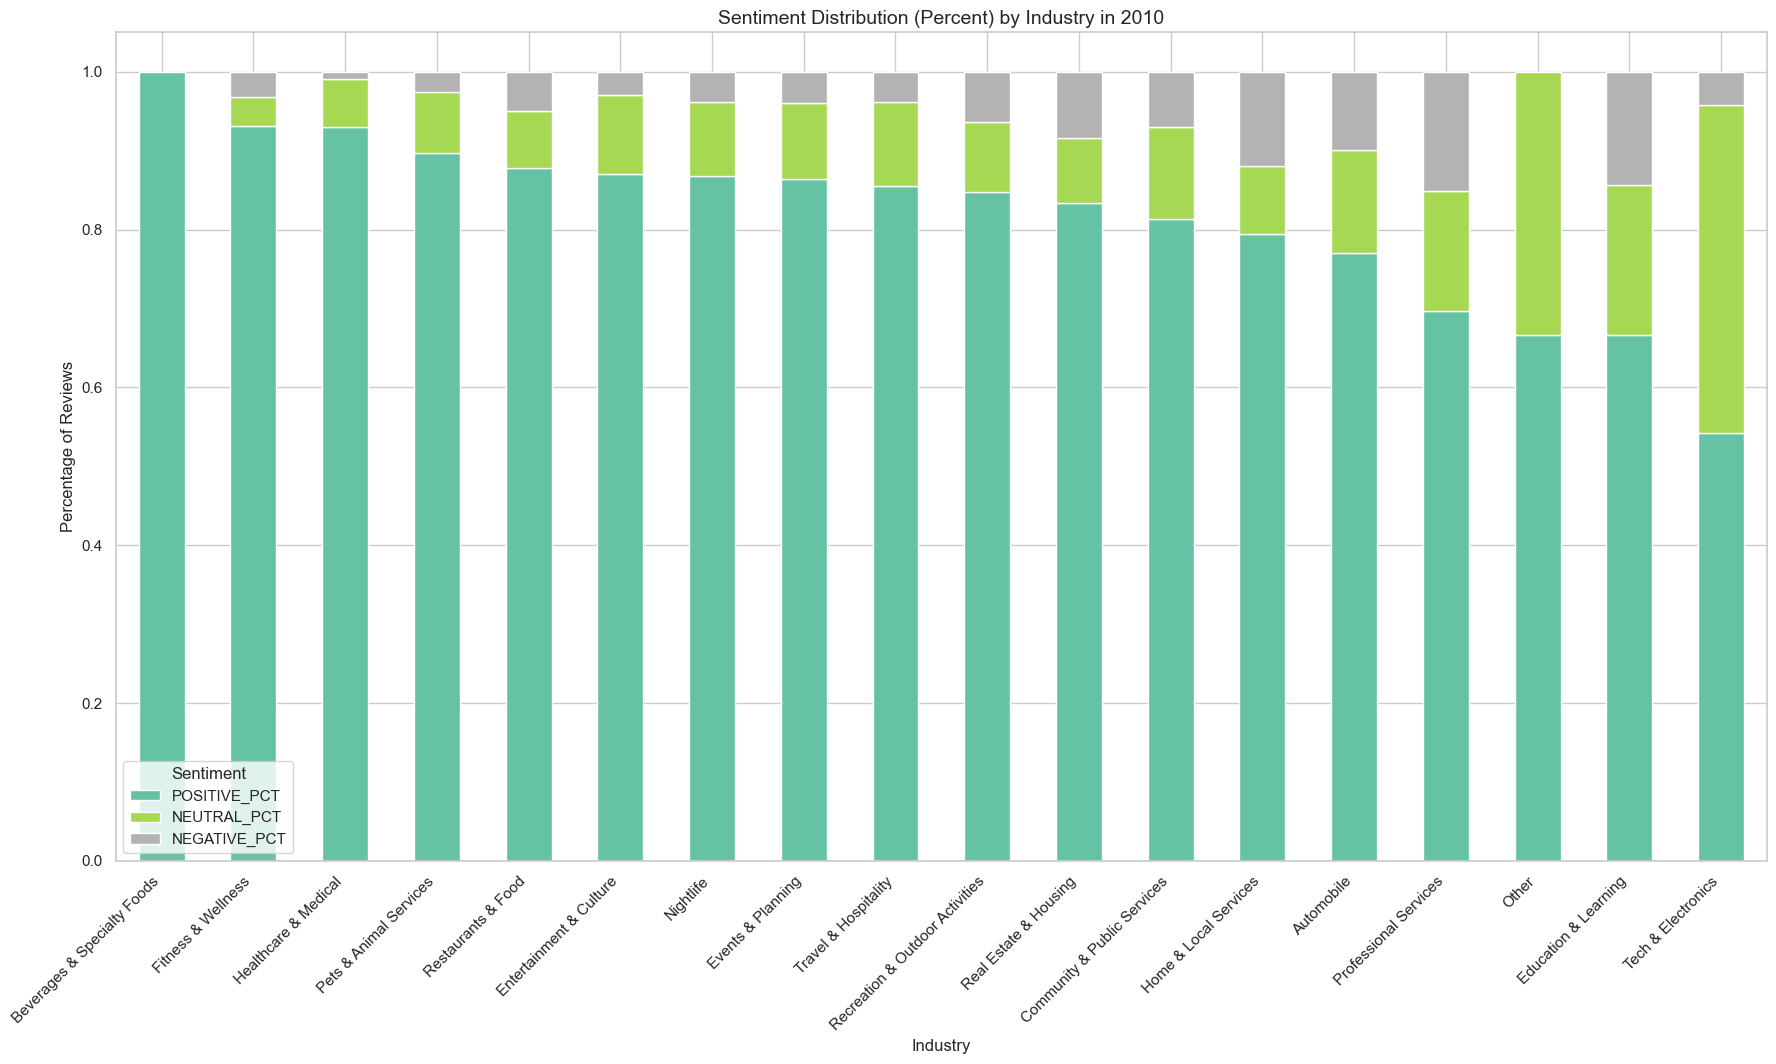

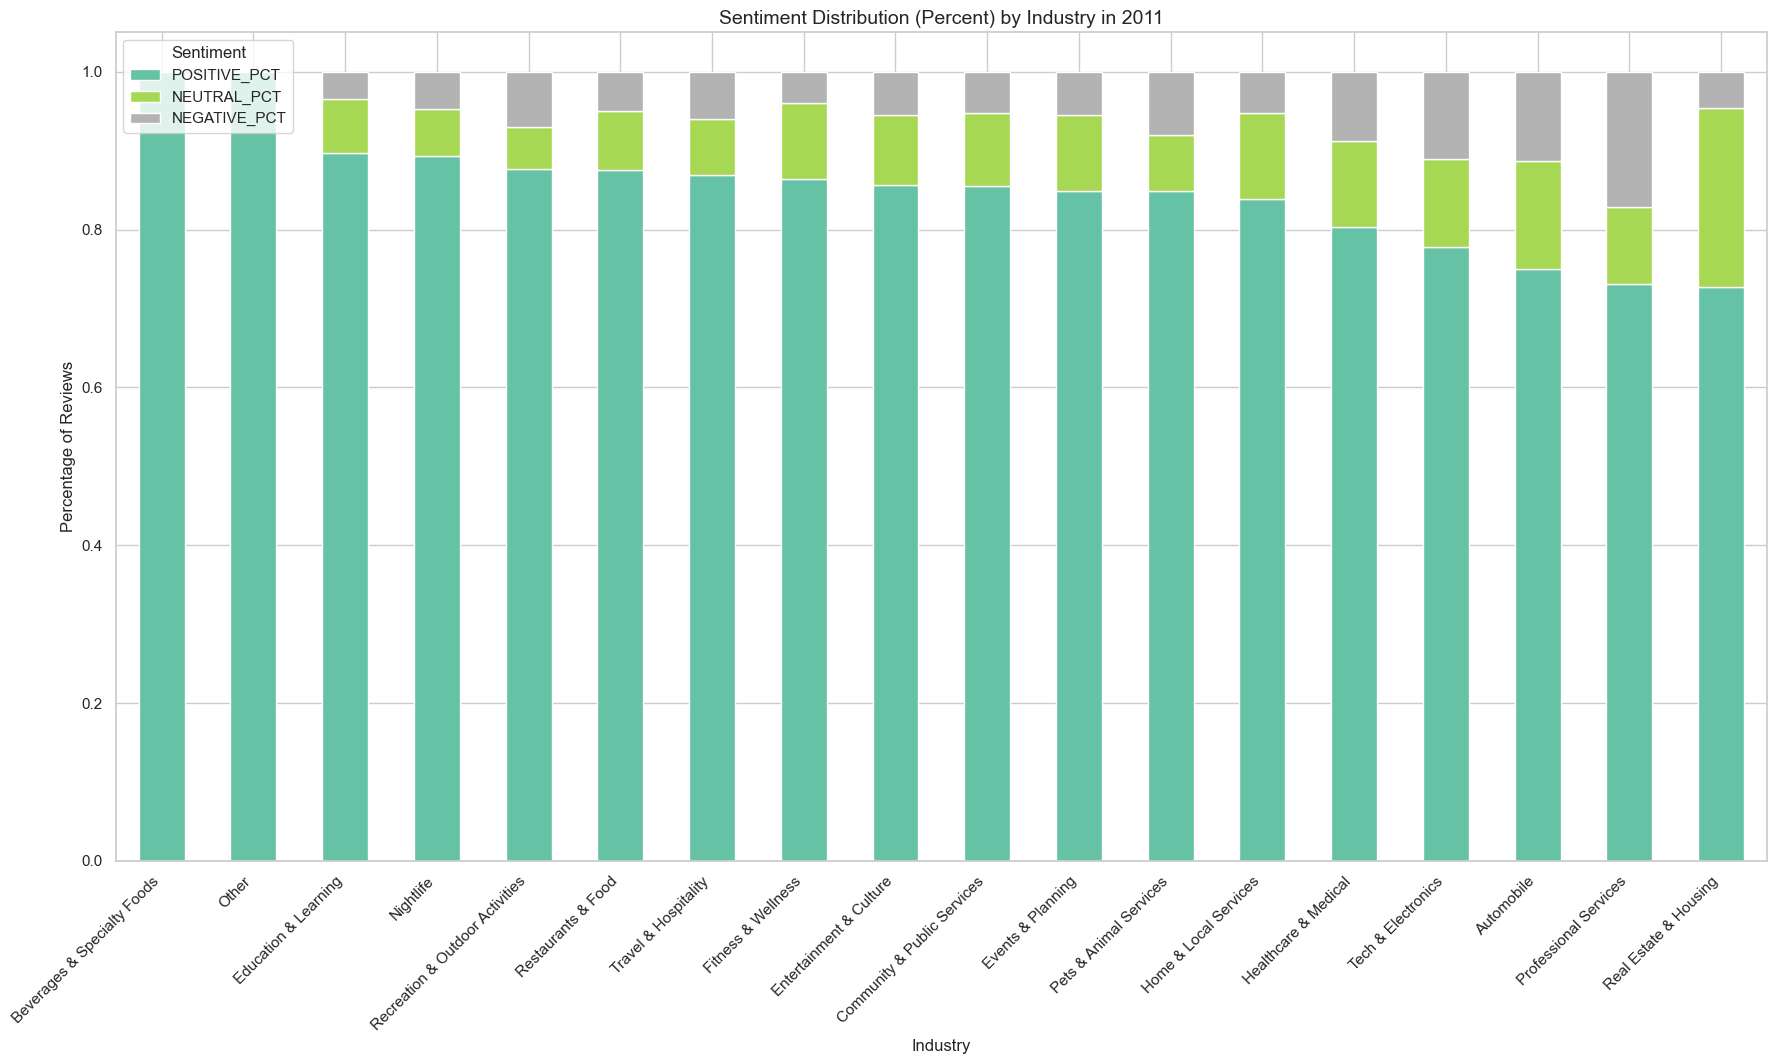

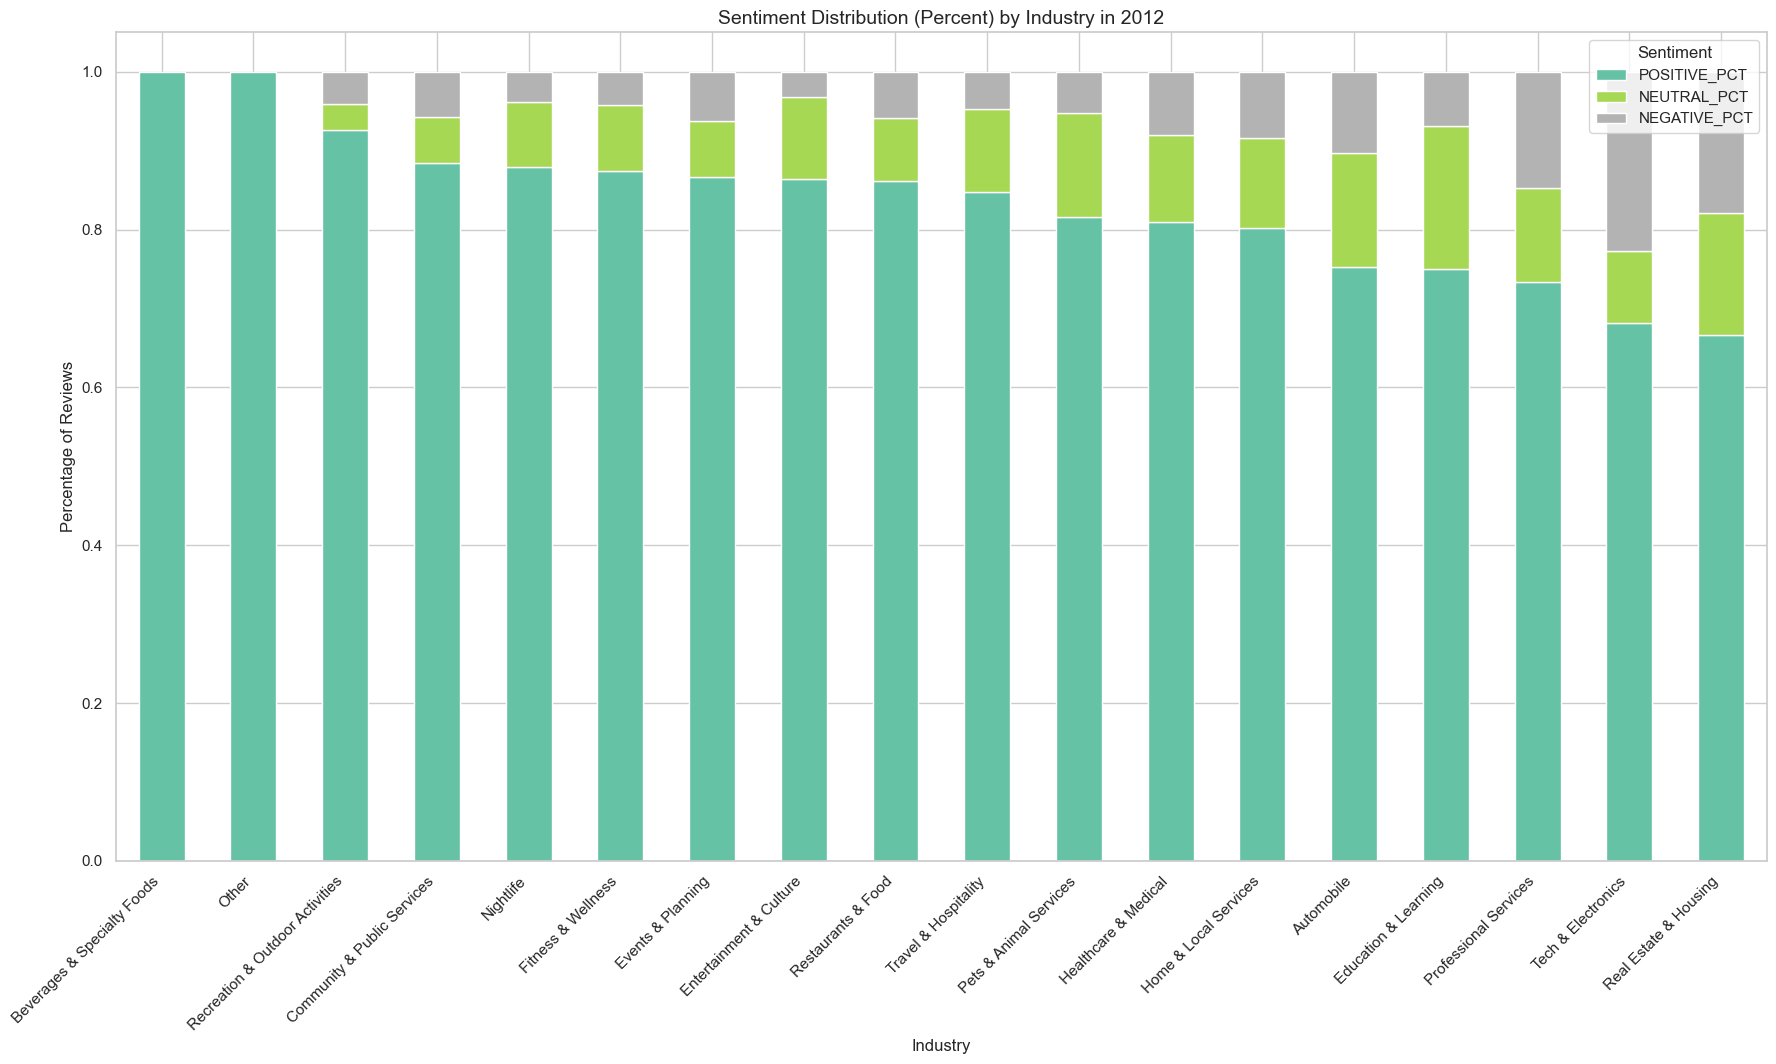

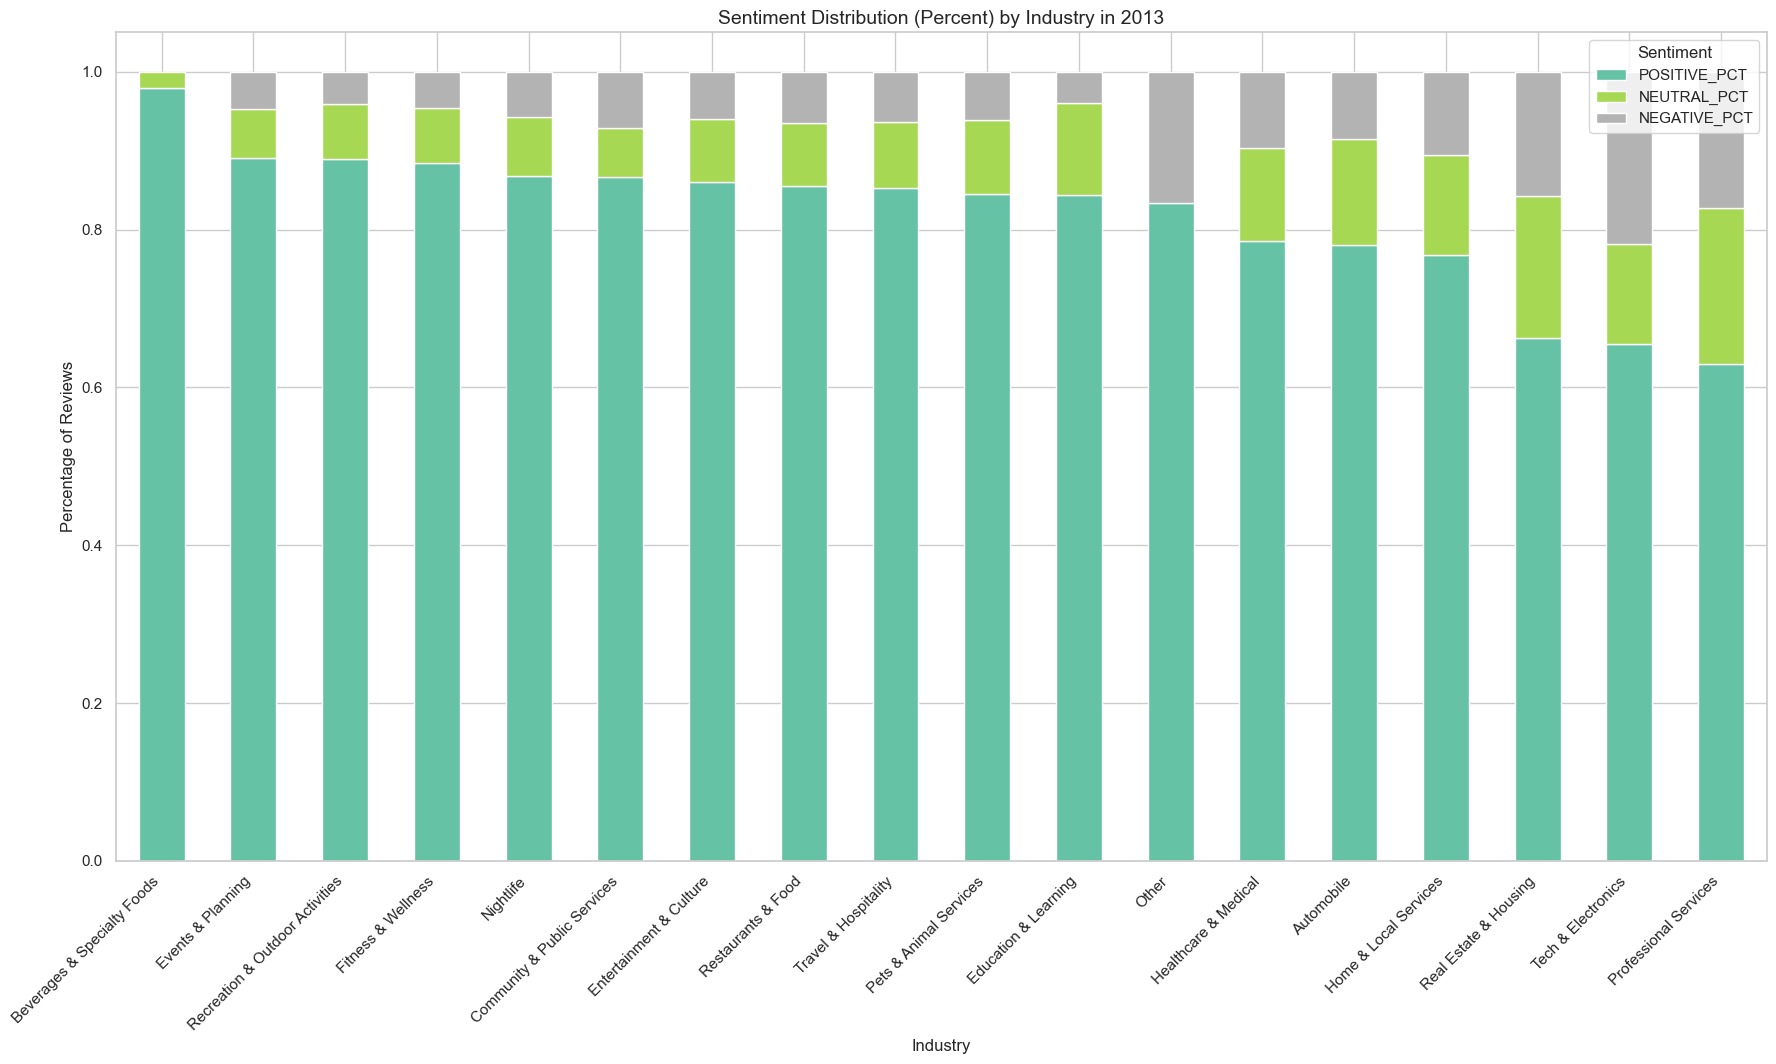

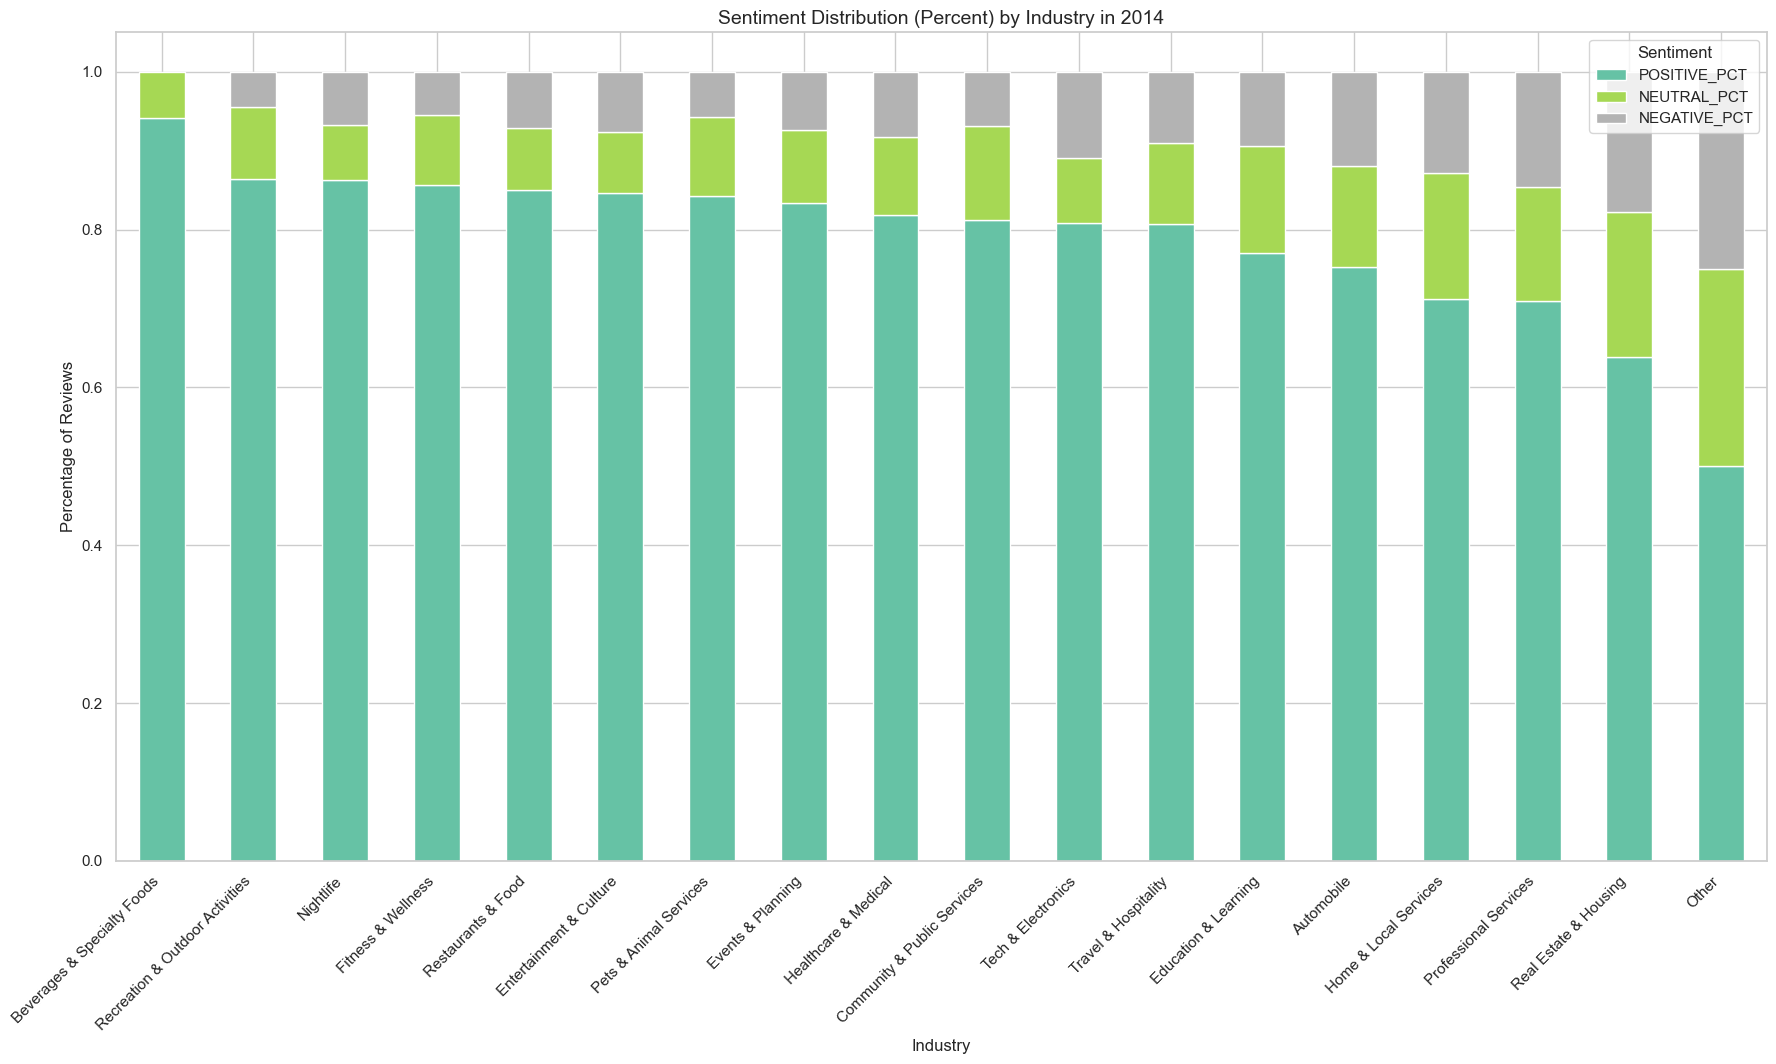

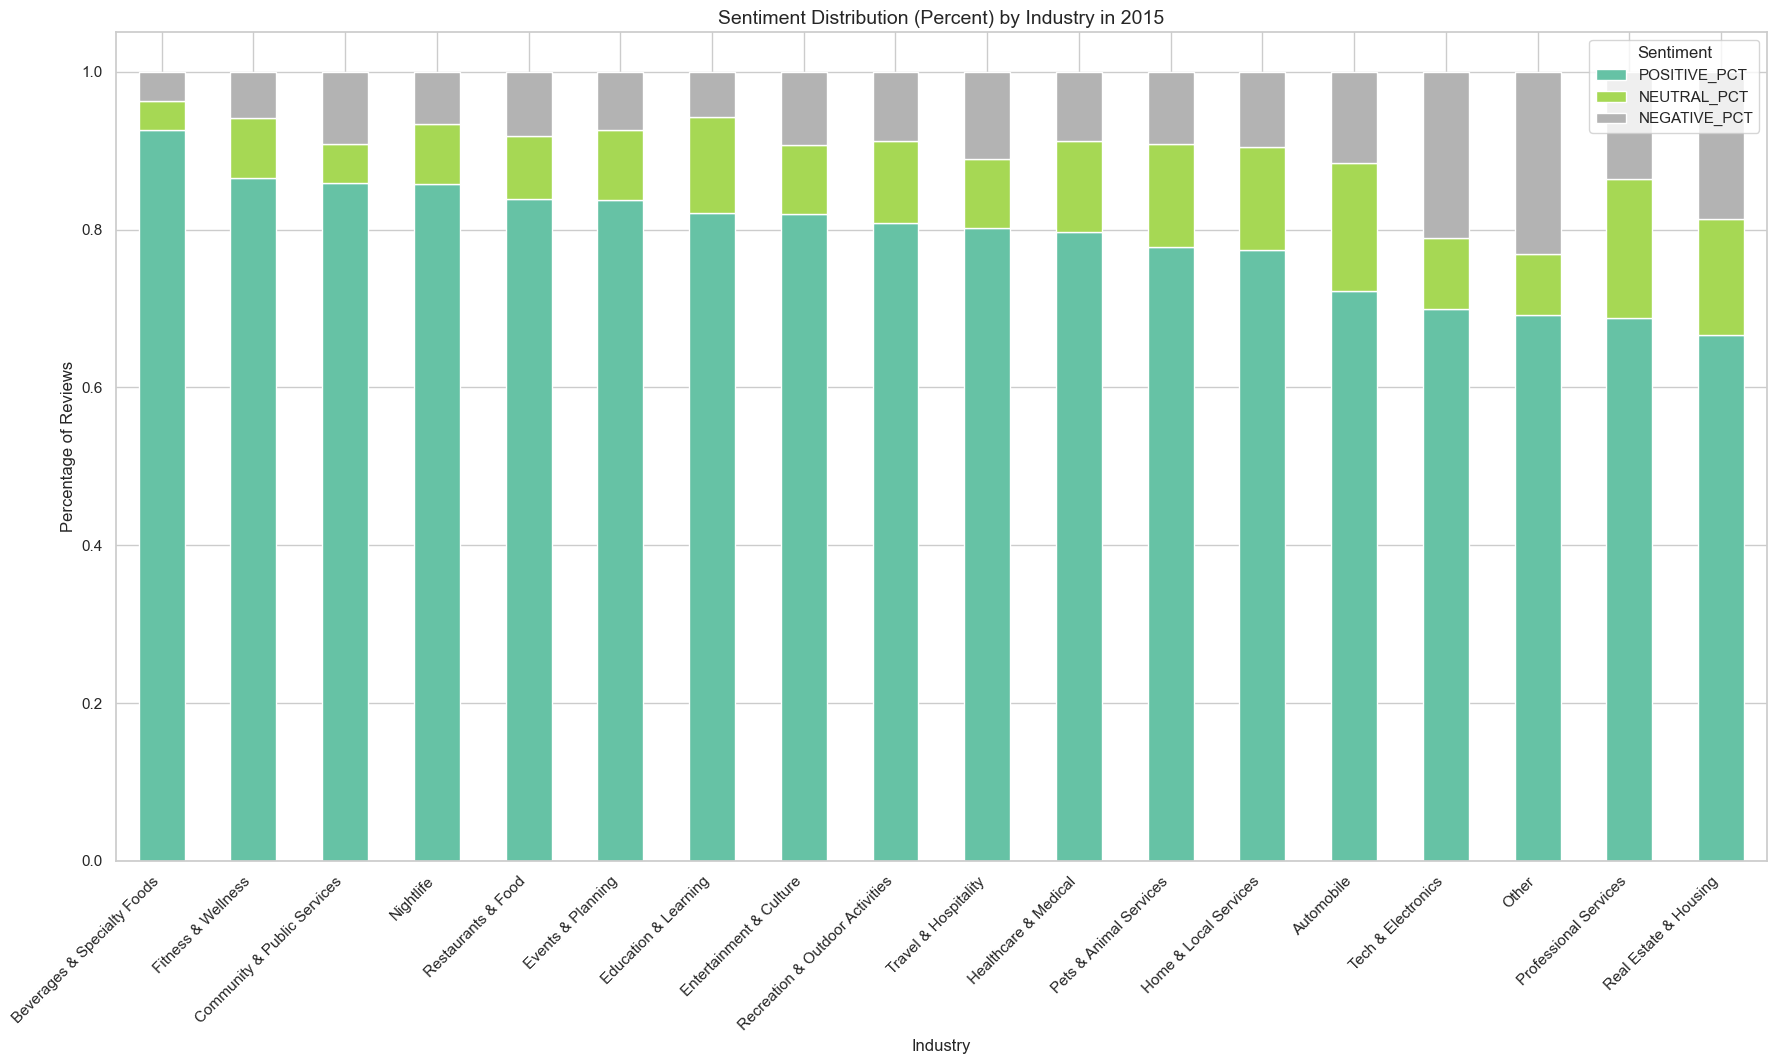

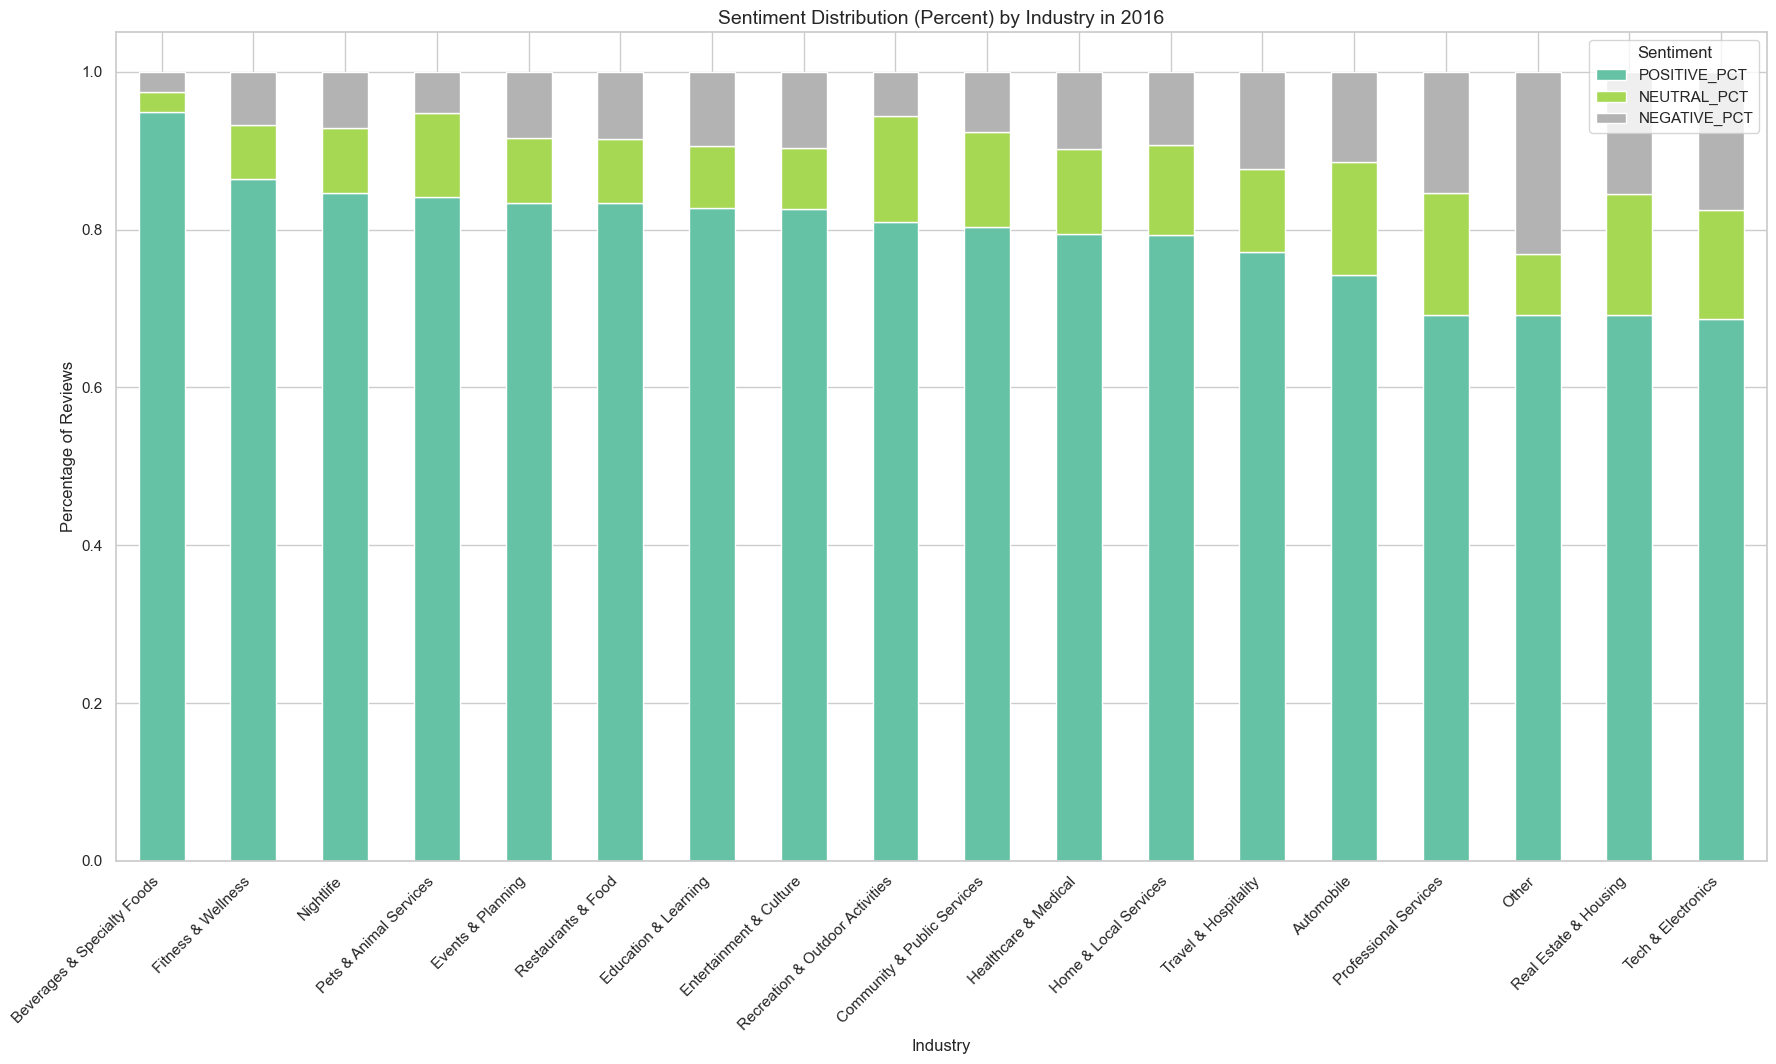

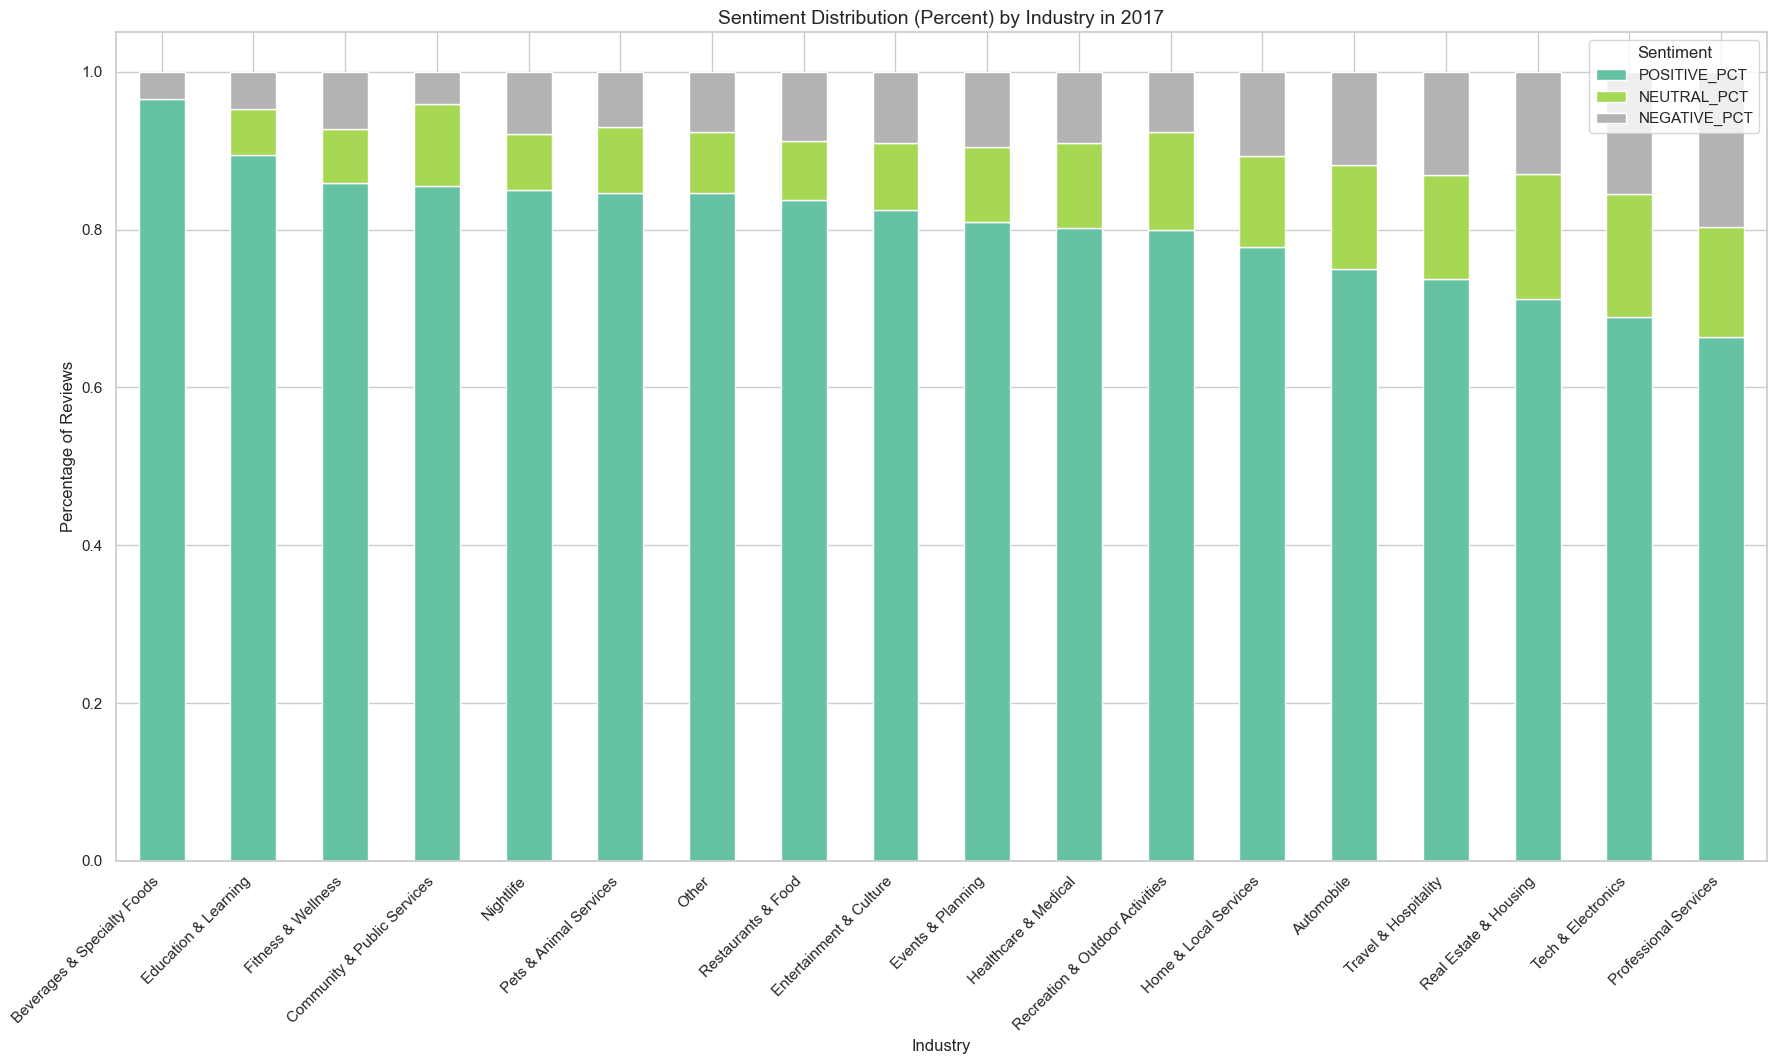

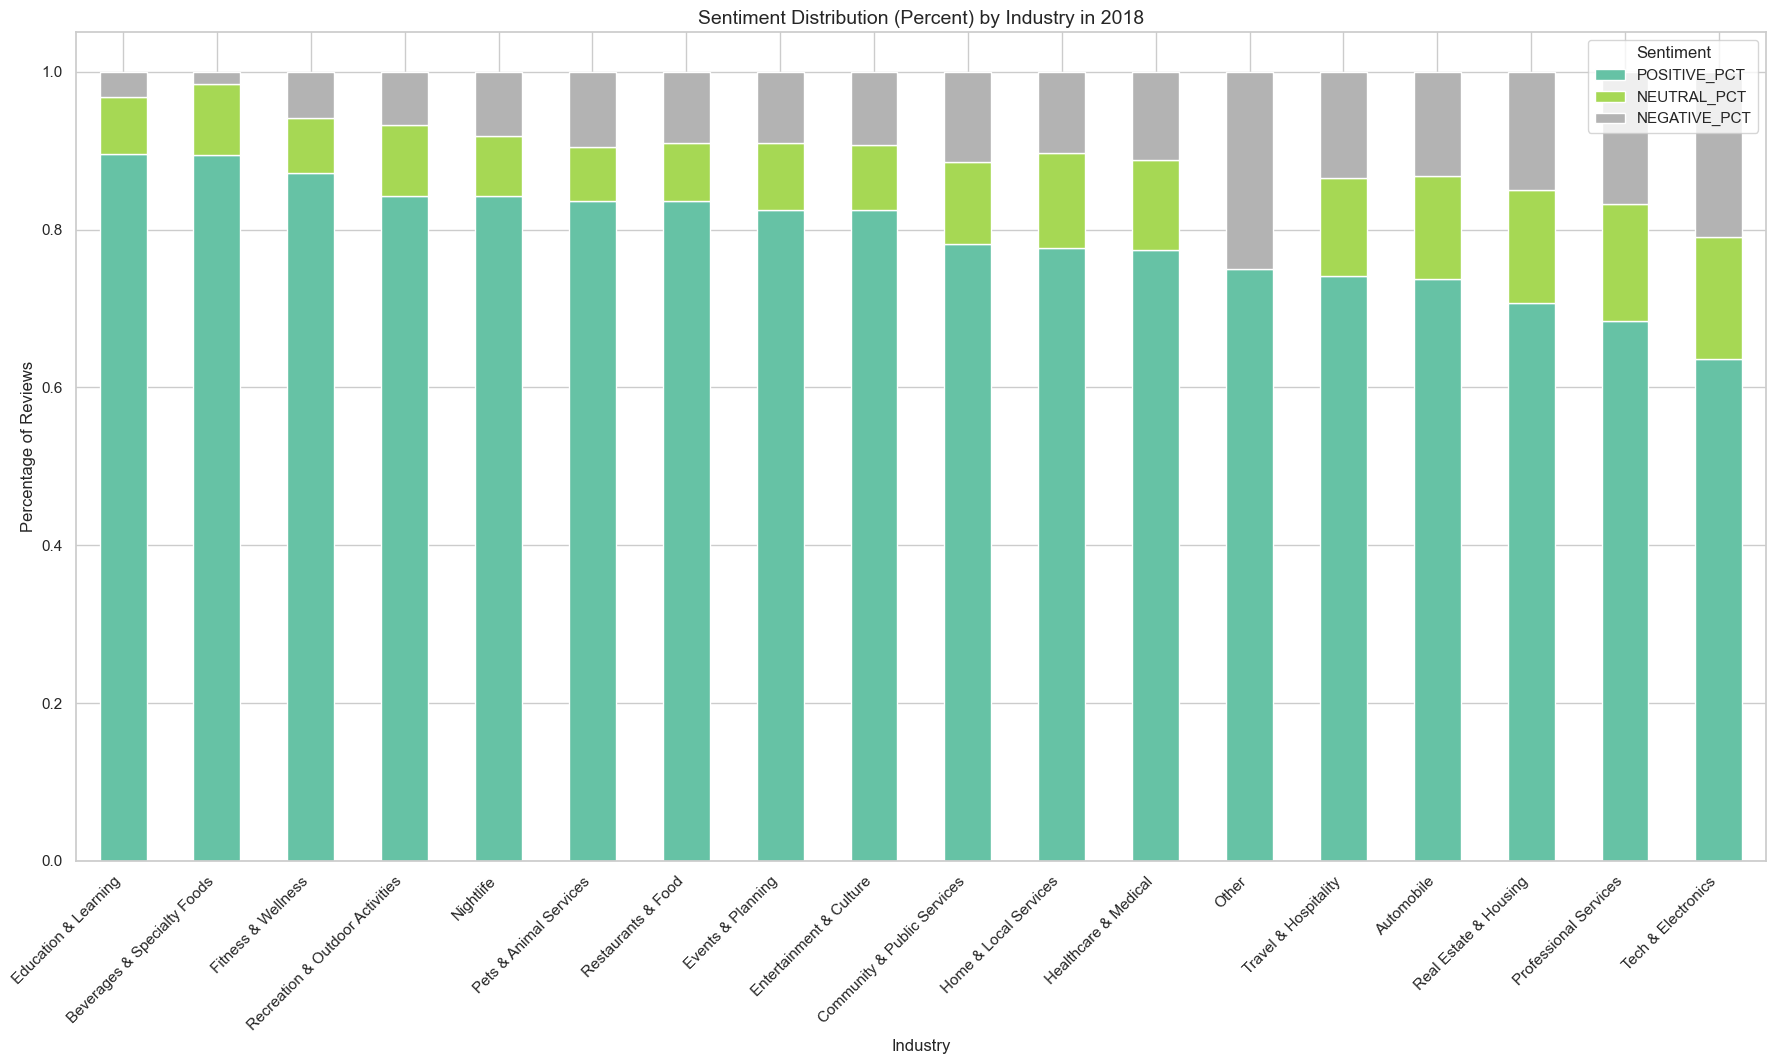

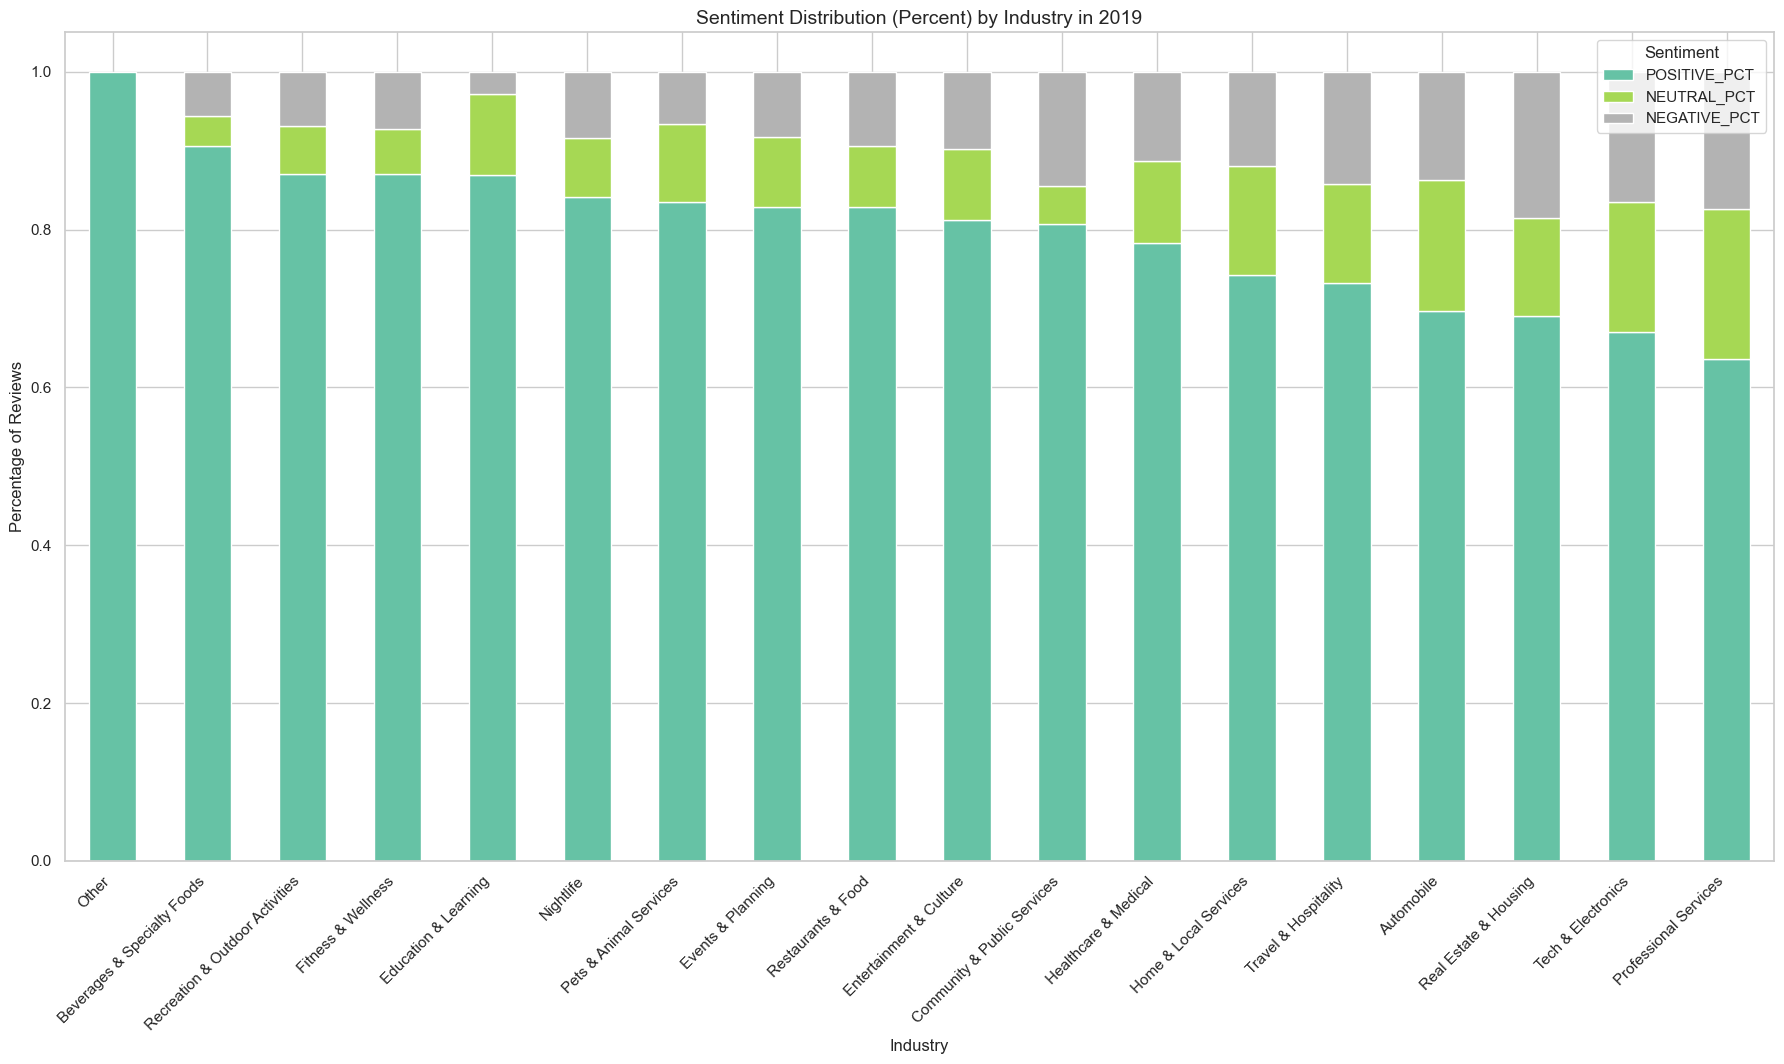

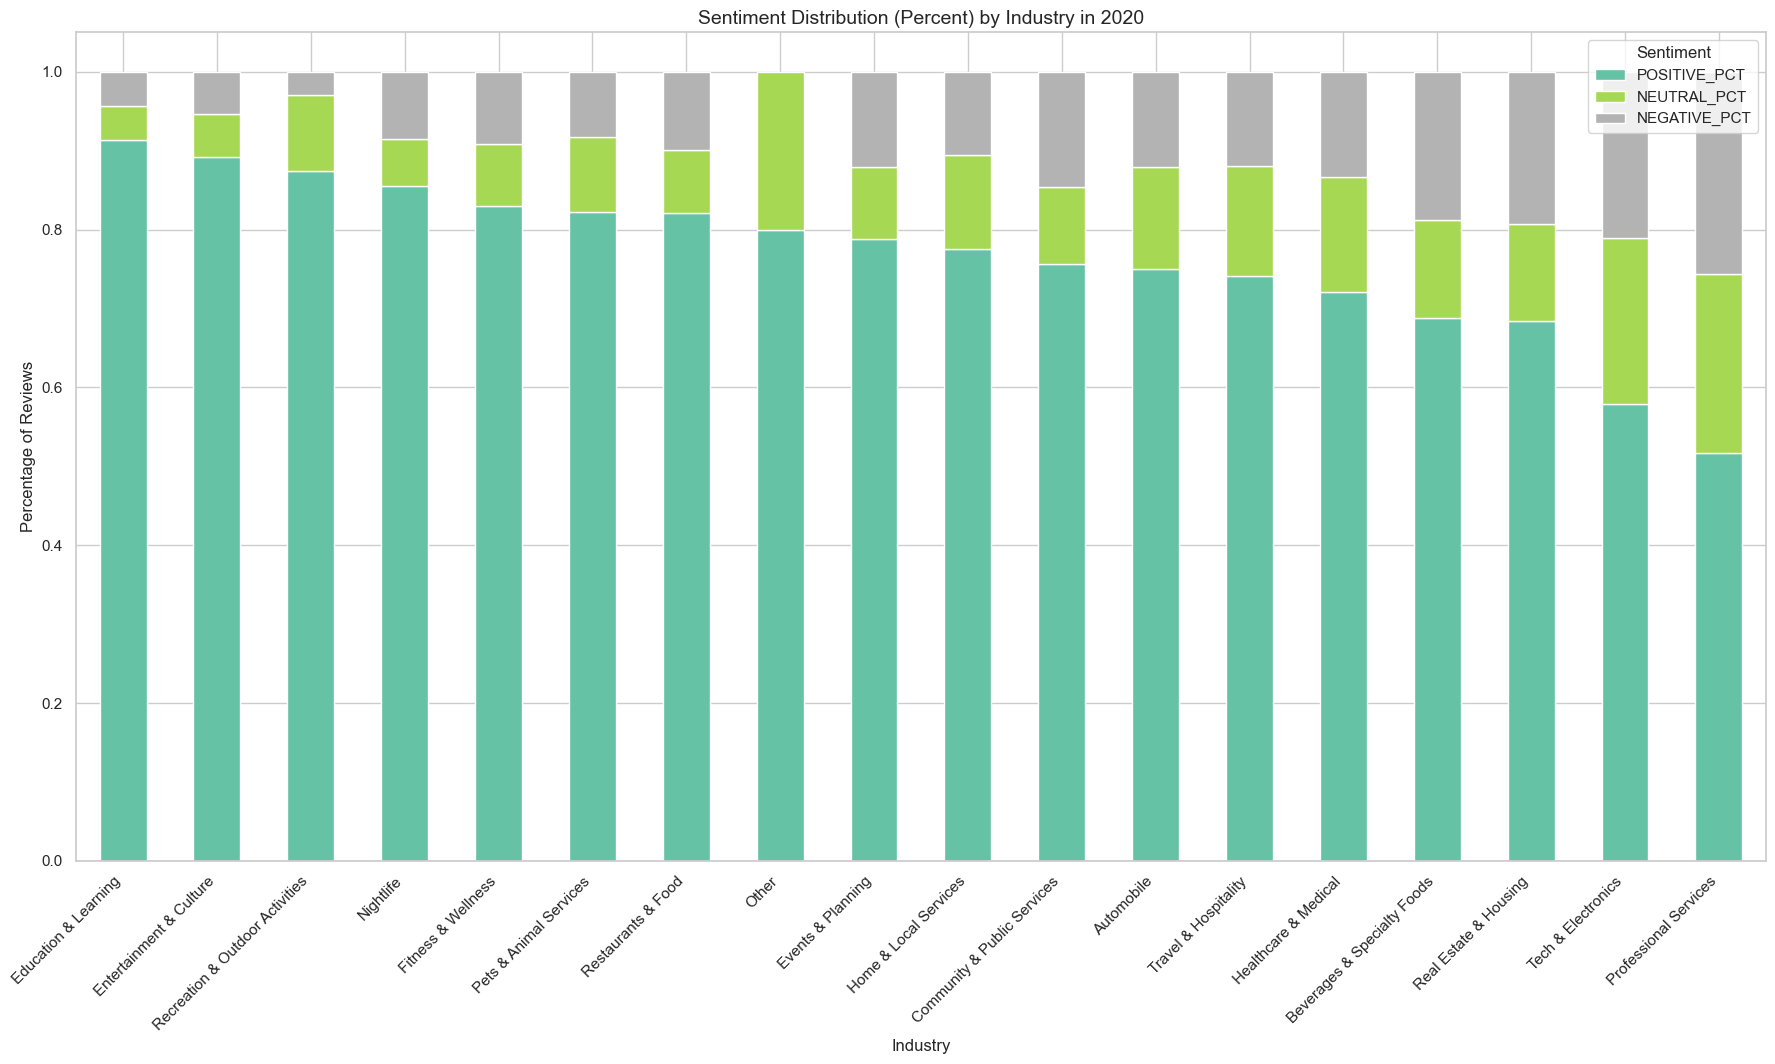

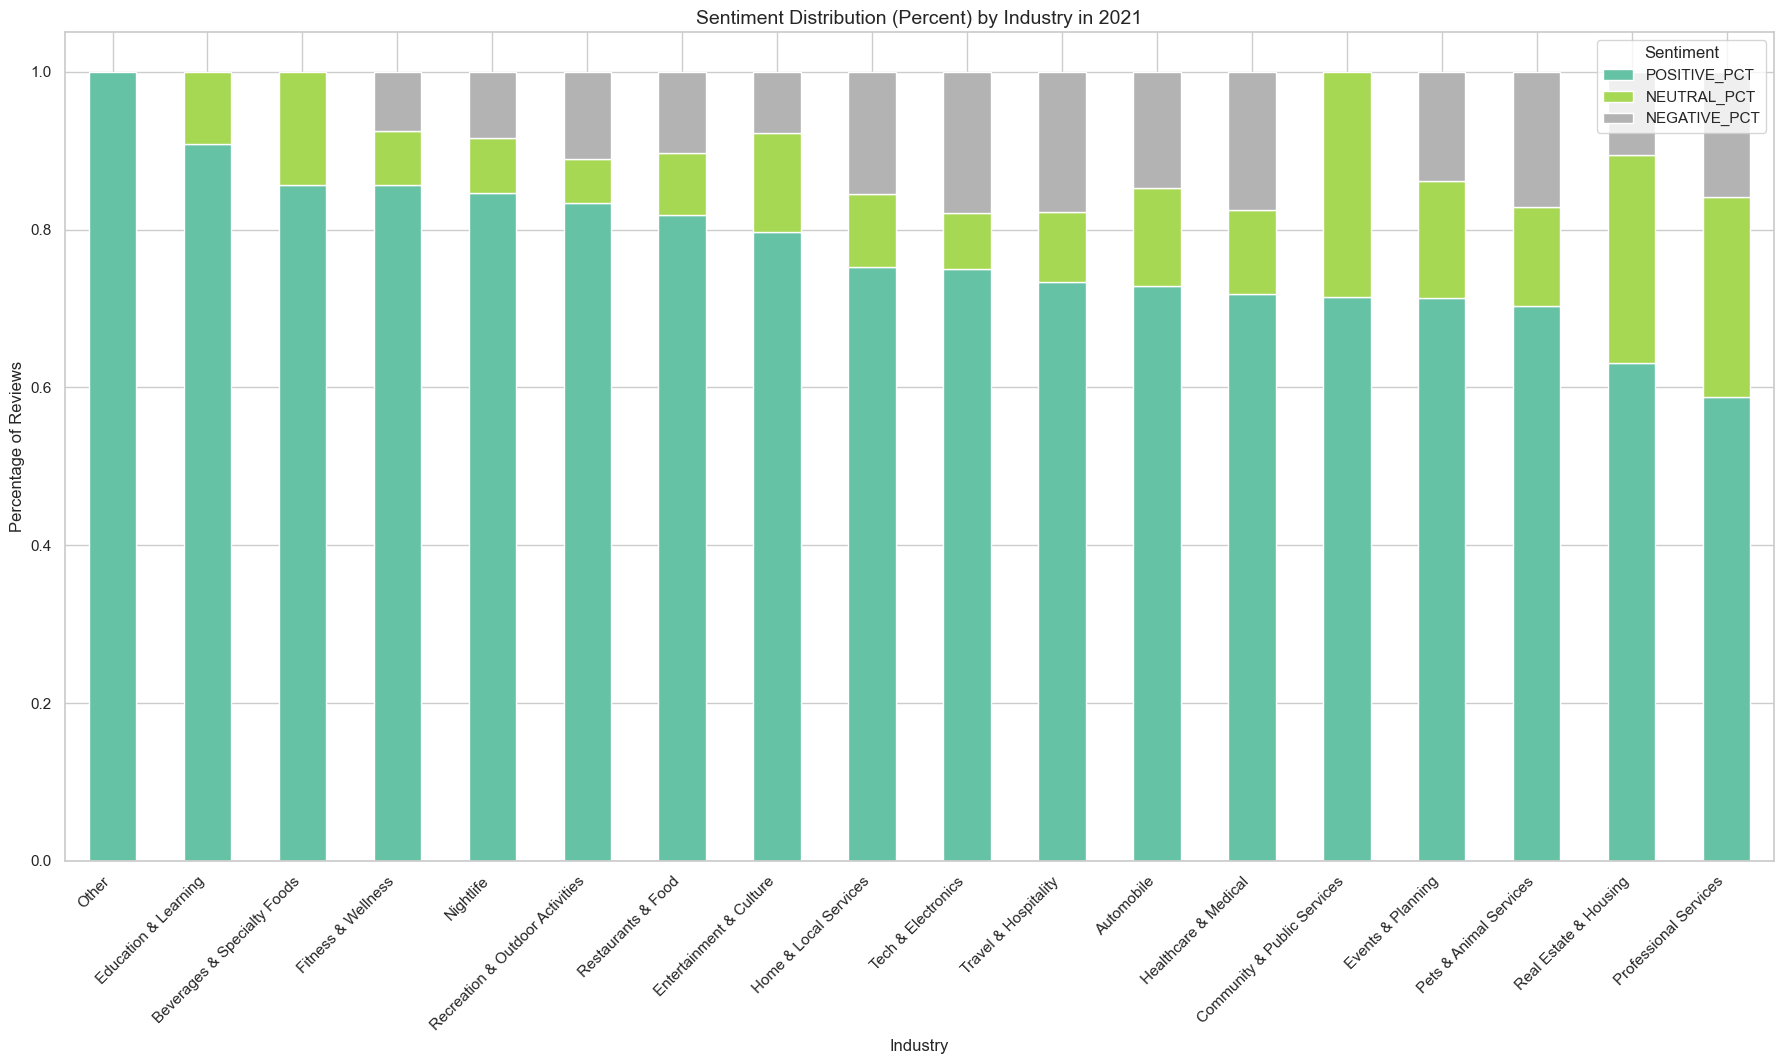

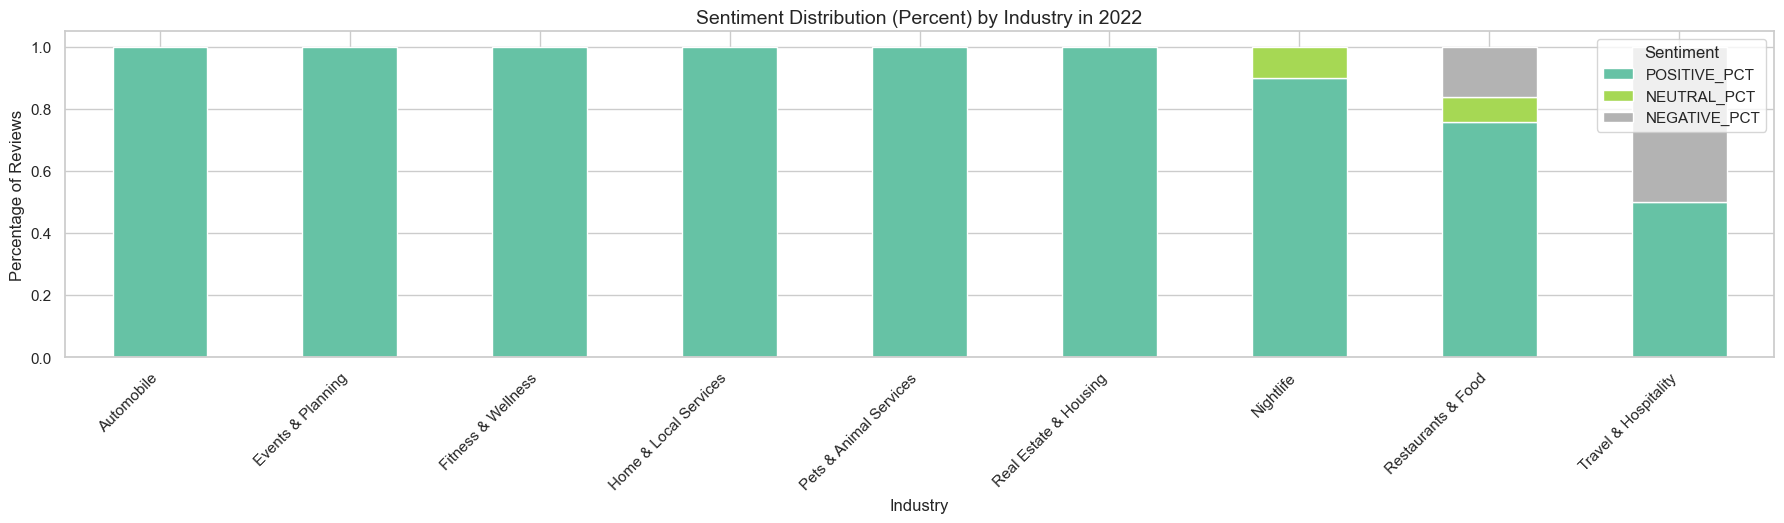

In [60]:
query = """
SELECT 
    di.INDUSTRY,
    EXTRACT(YEAR FROM fi.DATE_KEY) AS YEAR,
    SUM(fi.POSITIVE_COUNT) AS POSITIVE_COUNT,
    SUM(fi.NEGATIVE_COUNT) AS NEGATIVE_COUNT,
    SUM(fi.NEUTRAL_COUNT) AS NEUTRAL_COUNT
FROM FACT_INDUSTRY fi
JOIN DIM_INDUSTRY di ON fi.INDUSTRY_ID = di.INDUSTRY_ID
GROUP BY di.INDUSTRY, EXTRACT(YEAR FROM fi.DATE_KEY)
ORDER BY di.INDUSTRY, YEAR;
"""

# Load data
df = pd.read_sql(query, conn)

# Normalize counts to percentages per row (industry-year combo)
df['TOTAL'] = df['POSITIVE_COUNT'] + df['NEGATIVE_COUNT'] + df['NEUTRAL_COUNT']
df['POSITIVE_PCT'] = df['POSITIVE_COUNT'] / df['TOTAL']
df['NEGATIVE_PCT'] = df['NEGATIVE_COUNT'] / df['TOTAL']
df['NEUTRAL_PCT'] = df['NEUTRAL_COUNT'] / df['TOTAL']

# Loop by year and plot percentage bars
years = sorted(df['YEAR'].unique())

# Loop by year
for year in sorted(df['YEAR'].unique()):
    df_year = df[df['YEAR'] == year].copy()
    df_year = df_year.sort_values('POSITIVE_PCT', ascending=False)

    # Set index for clean plot labels
    df_year.set_index('INDUSTRY', inplace=True)

    df_pct = df_year[['POSITIVE_PCT', 'NEUTRAL_PCT', 'NEGATIVE_PCT']]

    # Create figure + axis and turn off the default figure wrapper
    fig, ax = plt.subplots(figsize=(18, 0.6 * len(df_pct)))  # Dynamic height
    df_pct.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

    # Styling
    ax.set_title(f"Sentiment Distribution (Percent) by Industry in {year}", fontsize=14)
    ax.set_xlabel("Industry", fontsize=12)
    ax.set_ylabel("Percentage of Reviews", fontsize=12)
    ax.legend(title='Sentiment')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Ensures no cutoffs
    plt.show()



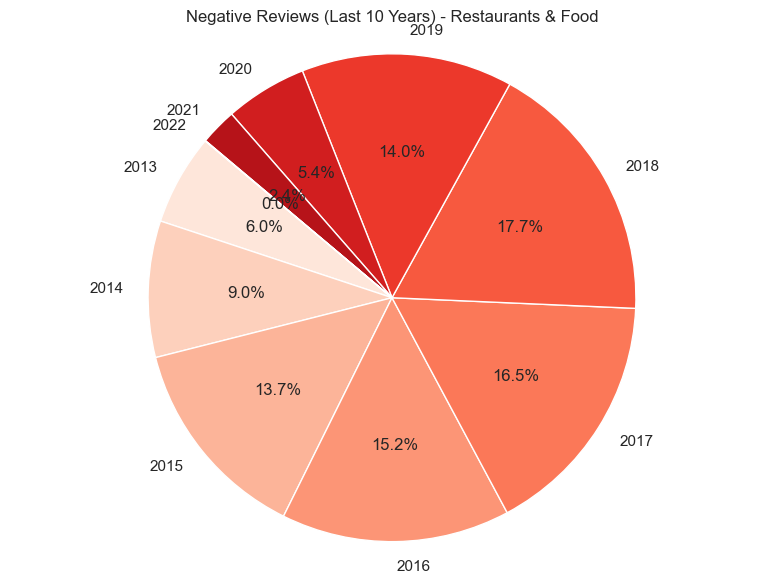

In [62]:
# Step 1: Filter for 'Restaurants & Food'
df_restaurant = df[df['INDUSTRY'] == 'Restaurants & Food']

# Step 2: Group by year and sum NEGATIVE_COUNT
neg_by_year = df_restaurant.groupby('YEAR')['NEGATIVE_COUNT'].sum().sort_index(ascending=False)

# Step 3: Keep only the latest 10 years
neg_by_year = neg_by_year.head(10).sort_index()  # Re-sort ascending for better pie flow

# Step 4: Plot
plt.figure(figsize=(8, 6))
plt.pie(
    neg_by_year,
    labels=neg_by_year.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Reds", len(neg_by_year))
)
plt.title("Negative Reviews (Last 10 Years) - Restaurants & Food")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [64]:
import snowflake.connector
import pandas as pd

conn = snowflake.connector.connect(
    user='SHRISTIKUMAR',
    password='Datawarehouseproject123',
    account='ibwqohb-sh66712',  # ← Use this exactly, lowercase works fine
    warehouse='INDUSTRY_WH',
    database='FINAL_PROJECT',
    schema='PUBLIC'
)


query = """
SELECT *
FROM FACT_INDUSTRY fi
JOIN DIM_INDUSTRY di ON fi.INDUSTRY_ID = di.INDUSTRY_ID
WHERE di.INDUSTRY = 'Restaurants & Food'
  AND EXTRACT(YEAR FROM fi.DATE_KEY) = 2022
  GROUP BY ;
"""

df_viz = pd.read_sql(query, conn)

print(df_viz.head())





/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/1425829682.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_viz = pd.read_sql(query, conn)


   INDUSTRY_ID    DATE_KEY  AVG_STARS  TOTAL_REVIEWS  TOTAL_USEFUL  \
0           17  2022-01-10       4.00              2             0   
1           17  2022-01-07       3.75              4             6   
2           17  2022-01-15       5.00              1             0   
3           17  2022-01-03       5.00              3             1   
4           17  2022-01-01       2.00              3             0   

   TOTAL_FUNNY  TOTAL_COOL  DISTINCT_USERS  DISTINCT_BUSINESSES  \
0            0           0               2                    2   
1            1           2               4                    4   
2            0           0               1                    1   
3            0           0               3                    3   
4            0           0               3                    3   

   AVG_SENTIMENT_SCORE  POSITIVE_COUNT  NEGATIVE_COUNT  NEUTRAL_COUNT  \
0             0.552083               2               0              0   
1             0.316554        

/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/1586282468.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_yearly.index, y=neg_yearly.values, palette='Reds')


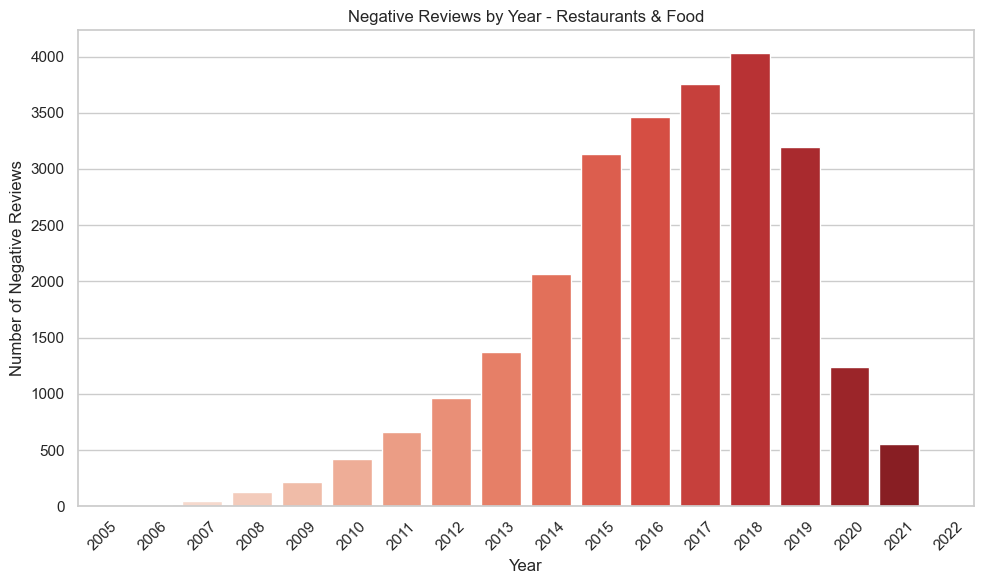

In [65]:
# Step 1: Filter data
df_restaurant = df[df['INDUSTRY'] == 'Restaurants & Food']

# Step 2: Group and aggregate
neg_yearly = df_restaurant.groupby('YEAR')['NEGATIVE_COUNT'].sum().sort_index()

# Step 3: Plot as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=neg_yearly.index, y=neg_yearly.values, palette='Reds')

plt.title("Negative Reviews by Year - Restaurants & Food")
plt.xlabel("Year")
plt.ylabel("Number of Negative Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
import snowflake.connector
import pandas as pd

conn = snowflake.connector.connect(
    user='SHRISTIKUMAR',
    password='Datawarehouseproject123',
    account='ibwqohb-sh66712',  # ← Use this exactly, lowercase works fine
    warehouse='INDUSTRY_WH',
    database='FINAL_PROJECT',
    schema='PUBLIC'
)


query = """
SELECT EXTRACT(YEAR FROM DATE_KEY) AS YEAR, AVG(AVG_STARS) AS AVG_RATING
FROM FACT_INDUSTRY fi
JOIN DIM_INDUSTRY di ON fi.INDUSTRY_ID = di.INDUSTRY_ID
WHERE di.INDUSTRY = 'Restaurants & Food'
GROUP BY YEAR
ORDER BY YEAR; ;
"""

df_viz = pd.read_sql(query, conn)

print(df_viz.head())

/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/1591128676.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_viz = pd.read_sql(query, conn)


   YEAR  AVG_RATING
0  2005    3.963636
1  2006    4.019274
2  2007    3.772363
3  2008    3.772470
4  2009    3.718814


/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/1025899595.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


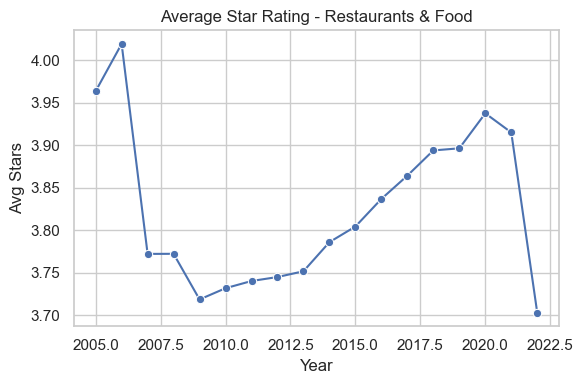

/var/folders/yv/htbgzxld50g_xg8qzk0m4mtr0000gn/T/ipykernel_18361/1025899595.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='YEAR', y='TOTAL_REVIEWS', palette='Blues')


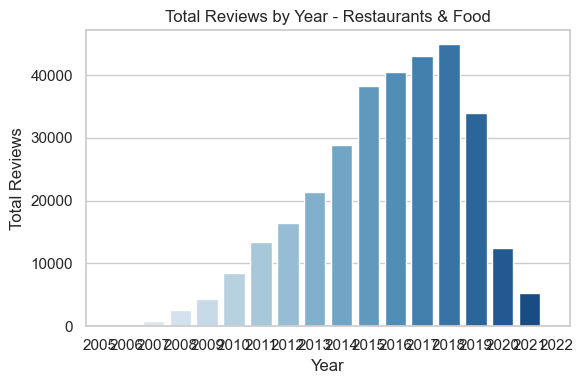

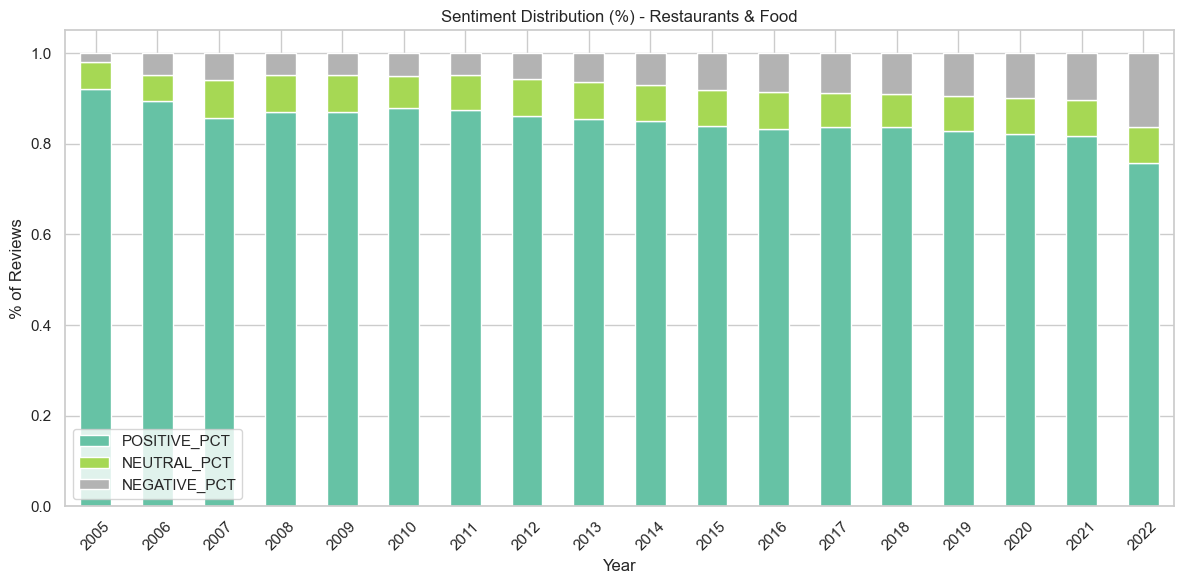

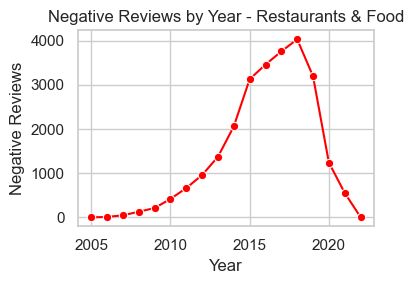

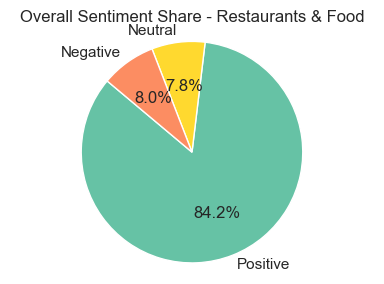

In [77]:


# 1. Load industry-specific data
query = """
SELECT 
    EXTRACT(YEAR FROM fi.DATE_KEY) AS YEAR,
    di.INDUSTRY,
    AVG(fi.AVG_STARS) AS AVG_STARS,
    SUM(fi.TOTAL_REVIEWS) AS TOTAL_REVIEWS,
    SUM(fi.TOTAL_USEFUL) AS TOTAL_USEFUL,
    SUM(fi.POSITIVE_COUNT) AS POSITIVE_COUNT,
    SUM(fi.NEGATIVE_COUNT) AS NEGATIVE_COUNT,
    SUM(fi.NEUTRAL_COUNT) AS NEUTRAL_COUNT,
    AVG(fi.AVG_SENTIMENT_SCORE) AS AVG_SENTIMENT_SCORE
FROM FACT_INDUSTRY fi
JOIN DIM_INDUSTRY di ON fi.INDUSTRY_ID = di.INDUSTRY_ID
WHERE di.INDUSTRY = 'Restaurants & Food'
GROUP BY di.INDUSTRY, YEAR
ORDER BY YEAR;
"""

df = pd.read_sql(query, conn)

# Normalize sentiment columns
df['TOTAL'] = df['POSITIVE_COUNT'] + df['NEGATIVE_COUNT'] + df['NEUTRAL_COUNT']
df['POSITIVE_PCT'] = df['POSITIVE_COUNT'] / df['TOTAL']
df['NEGATIVE_PCT'] = df['NEGATIVE_COUNT'] / df['TOTAL']
df['NEUTRAL_PCT'] = df['NEUTRAL_COUNT'] / df['TOTAL']

# 2. Visual: Average Stars Over Time
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x='YEAR', y='AVG_STARS', marker='o')
plt.title("Average Star Rating - Restaurants & Food")
plt.xlabel("Year")
plt.ylabel("Avg Stars")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Visual: Total Reviews Over Time
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='YEAR', y='TOTAL_REVIEWS', palette='Blues')
plt.title("Total Reviews by Year - Restaurants & Food")
plt.xlabel("Year")
plt.ylabel("Total Reviews")
plt.tight_layout()
plt.show()

# 4. Visual: Sentiment Breakdown (Percent) - Stacked Bar
df.set_index('YEAR', inplace=True)
df[['POSITIVE_PCT', 'NEUTRAL_PCT', 'NEGATIVE_PCT']].plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Sentiment Distribution (%) - Restaurants & Food")
plt.xlabel("Year")
plt.ylabel("% of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Visual: Negative Review Counts - Line
plt.figure(figsize=(4, 3))
sns.lineplot(data=df, x=df.index, y='NEGATIVE_COUNT', marker='o', color='red')
plt.title("Negative Reviews by Year - Restaurants & Food")
plt.xlabel("Year")
plt.ylabel("Negative Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()

# Reset index for further use
df.reset_index(inplace=True)

# 6. Visual: Pie Chart of Total Sentiment Share
total_sentiment = df[['POSITIVE_COUNT', 'NEUTRAL_COUNT', 'NEGATIVE_COUNT']].sum()
plt.figure(figsize=(4, 3))
plt.pie(
    total_sentiment,
    labels=['Positive', 'Neutral', 'Negative'],
    autopct='%1.1f%%',
    colors=['#66c2a5', '#ffd92f', '#fc8d62'],
    startangle=140
)
plt.title("Overall Sentiment Share - Restaurants & Food")
plt.axis('equal')
plt.tight_layout()
plt.show()

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)